In [1]:
## DATA HANDLING LIBRARIES
import numpy as np
import pandas as pd
from collections import OrderedDict

## WARNING LIBRARIES
import warnings
warnings.filterwarnings('ignore')

## STATS LIBRARIES
from statsmodels.stats.outliers_influence import variance_inflation_factor

## ENCODING LIBRARIES
from sklearn.preprocessing import LabelEncoder

## MODEL BUILDING LIBRARIES
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRFRegressor

## MODEL EVALUATION LIBRARIES
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

## CLUSTERING LIBRARIES
from sklearn.cluster import KMeans

## DATA VISUALIZING LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_excel("Medibuddy insurance data personal details copy.xlsx")
data2 = pd.read_excel("Medibuddy Insurance Data Price (1) (1).csv.xlsx")

In [3]:
data1

,Policy no.,children,smoker,region
0,PLC157006,0.0,no,southwest
1,PLC157033,1.0,no,southwest
2,PLC157060,0.0,no,southwest
3,PLC157087,1.0,no,southwest
4,PLC157186,5.0,no,southwest
...,...,...,...,...
1333,PLC168400,1.0,yes,northeast
1334,PLC168436,0.0,yes,northeast
1335,PLC168634,2.0,yes,northeast
1336,PLC168652,0.0,yes,northeast


In [4]:
data2

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19.0,female,27.900,16884.92400
1,PLC156907,18.0,male,33.770,1725.55230
2,PLC156916,28.0,male,33.000,4449.46200
3,PLC156925,33.0,male,22.705,21984.47061
4,PLC156934,32.0,male,28.880,3866.85520
...,...,...,...,...,...
1333,PLC168895,50.0,male,30.970,10600.54830
1334,PLC168904,18.0,female,31.920,2205.98080
1335,PLC168913,18.0,female,36.850,1629.83350
1336,PLC168922,21.0,female,25.800,2007.94500


In [5]:
## CONCATINATING TWO DATA INTO ONE DATADET
# df = pd.concat([data1, data2], axis= 1)
# df

### Merging two dataframe into one with OUTER join


In [6]:
df = pd.merge(data1, data2, how= 'outer')
df

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0.0,no,southwest,23.0,male,34.400,1826.84300
1,PLC157033,1.0,no,southwest,19.0,male,24.600,1837.23700
2,PLC157060,0.0,no,southwest,56.0,male,40.300,10602.38500
3,PLC157087,1.0,no,southwest,30.0,female,32.400,4149.73600
4,PLC157186,5.0,no,southwest,19.0,female,28.600,4687.79700
...,...,...,...,...,...,...,...,...
1333,PLC168400,1.0,yes,northeast,39.0,male,29.925,22462.04375
1334,PLC168436,0.0,yes,northeast,18.0,female,21.660,14283.45940
1335,PLC168634,2.0,yes,northeast,42.0,male,24.605,21259.37795
1336,PLC168652,0.0,yes,northeast,29.0,female,21.850,16115.30450


In [7]:
# df1 = pd.merge (data1, data2, on = 'Policy no.')
# df1

### Making a copy of original dataset

In [8]:
df_copy = df

# Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   float64
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   float64
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(4), object(4)
memory usage: 94.1+ KB


In [10]:
## converting float dtype to int dtype
df['children'] = df['children'].astype('int64')
df['age'] = df['age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 94.1+ KB


### Checking for null values


In [11]:
df.isnull().sum()

Policy no.        0
children          0
smoker            0
region            0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

#### Hence,  there are no null values in the dataset

### Descriptive Stats  

In [12]:
def custom_summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtype != object:
            stats = OrderedDict({
                "Feature Name" : col,
                "Count" : my_df[col].count(),
                "Minimum" : round(my_df[col].min(), 3),
                "Quartile1" : round(my_df[col].quantile(0.25), 3),
                "Mean" : round(my_df[col].mean(), 3),
                "Median" : round(my_df[col].median(), 3),
                "Quartile3" : round(my_df[col].quantile(0.75), 3),
                "Maximum" : round(my_df[col].max(), 3),
                "Variance" : round(my_df[col].var(), 1),
                "Standard Deviation" : round(my_df[col].std(), 3),
                "Skewness" : round(my_df[col].skew(), 3),
                "Kurtosis" : round(my_df[col].kurt(), 3),
                "IQR" : round(my_df[col].quantile(0.75) - my_df[col].quantile(0.25), 3)
            })
            result.append(stats) 
    result_df = pd.DataFrame(result)
    
    ## Skewness type
    skew_type = []
    for i in result_df["Skewness"]:
        if i < -1:
            skew_type.append("Highly Negatively Skewed")
        elif -1 < i < -0.5:
            skew_type.append("Moderately Negatively Skewed")
        elif -0.5 < i < 0:
            skew_type.append("Fairly Negatively Skewed")
        elif 0 < i < 0.5:
            skew_type.append("Fairly Positively Skewed")
        elif 0.5 < i < 1:
            skew_type.append("Moderately positively Skewed")
        elif i > 1:
            skew_type.append("Highly Positively Skewed")
    result_df["Skewness Type"] = skew_type
    
    ## Kurtosis Type
    kurt_type = []
    for j in result_df["Kurtosis"]:
        if j >= 1:
            kurt_type.append("Leptokurtic")
        elif j <= -1:
            kurt_type.append("Platykurtic")
        else:
            kurt_type.append("Mesokurtic")
    result_df["Kurtosis Type"] = kurt_type
    
    # Outliers
    upperlim = stats["Quartile3"] + 1.5 * stats["IQR"]
    lowerlim = stats["Quartile1"] - 1.5 * stats["IQR"]
    
    if len([x for x in my_df[col] if x < lowerlim or x > upperlim]) > 0:
        outlier_comment = "Has outliers"
    else :
        outlier_comment = "No outliers"
        
    result_df["outlier_comment"] = outlier_comment
    
    return result_df

In [13]:
custom_summary(df)

,Feature Name,Count,Minimum,Quartile1,Mean,Median,Quartile3,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,IQR,Skewness Type,Kurtosis Type,outlier_comment
0,children,1338,0.000,0.000,1.095,1.000,2.000,5.000,1.5,1.205,0.938,0.202,2.000,Moderately positively Skewed,Mesokurtic,Has outliers
1,age,1338,18.000,27.000,39.207,39.000,51.000,64.000,197.4,14.050,0.056,-1.245,24.000,Fairly Positively Skewed,Platykurtic,Has outliers
2,bmi,1338,15.960,26.296,30.663,30.400,34.694,53.130,37.2,6.098,0.284,-0.051,8.398,Fairly Positively Skewed,Mesokurtic,Has outliers
3,charges in INR,1338,1121.874,4740.287,13270.422,9382.033,16639.913,63770.428,146652372.2,12110.011,1.516,1.606,11899.625,Highly Positively Skewed,Leptokurtic,Has outliers


### Analysis of Descriptive Stats

1. All column count values are same. So, that means there are no null values in the dataset.
2. Mean > Median, Skewness is there.
3. age range is 18 - 64.
4. all the columns has outliers

# Treating Outliers

In [14]:
def replace_outliers(df, col, method = "Quartile", strategy = "Median"):
    col_data = df[col]
    
    if method == "Quartile":
        q2 = df[col].median()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lowerlim = q1 - 1.5 * iqr
        upperlim = q3 + 1.5 * iqr
        
        
    elif method == "Standard Deviation":
        col_mean = df[col].mean()
        col_std = df[col].std()
        lowerlim = col_mean - 2 * col_std
        upperlim = col_mean + 2 * col_std
        
    outlier = df.loc[(col_data < lowerlim) | (col_data > upperlim), col]
    outlier_density = len(outlier) / len(df)
    
    if len(outlier) == 0:
        print(f"The {col} has no outliers")
    else:
        print(f"The {col} has outliers")
        print(f"Outlier density is", outlier_density)
        
        
        
    if strategy == 'Median':
        df.loc[(col_data < lowerlim) | (col_data > upperlim), col] = df[col].median()
       
    elif strategy == 'Mean':
            df.loc[(col_data < lowerlim) | (col_data > upperlim), col] = df[col].mean()

# ODT Plots

In [15]:
def odt_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (30,30))
    
    
    ## DESCRIPTIVE STATS USING BOX PLOT
    sns.boxplot(df[col], ax = ax1)
    ax1.set_title(col + 'BOX PLOT')
    ax1.set_xlabel('BOX PLOT')
    ax1.set_ylabel('VALUES')
    
    
    ## HISTOGRAM WITH OUTLIERS USING DISTPLOT
    sns.distplot(df[col], ax = ax2)
    ax2.set_title(col + 'HISTOGRAM WITH OUTLIERS')
    ax2.set_xlabel('DENSITY')
    ax2.set_ylabel('VALUES')
    
    ## HISTOGRAM AFTER TREATING OUTLIERS USING DISTPLOT
    y = replace_outliers(df, col)
    sns.boxplot(df[col], ax = ax3)
    ax3.set_title(col + 'HISTOGRAM WITHOUT OUTLIERS')
    ax3.set_xlabel('DENSITY')
    ax3.set_ylabel('VALUES')

The children has no outliers
The age has no outliers
The bmi has outliers
Outlier density is 0.006726457399103139
The charges in INR has outliers
Outlier density is 0.1038863976083707


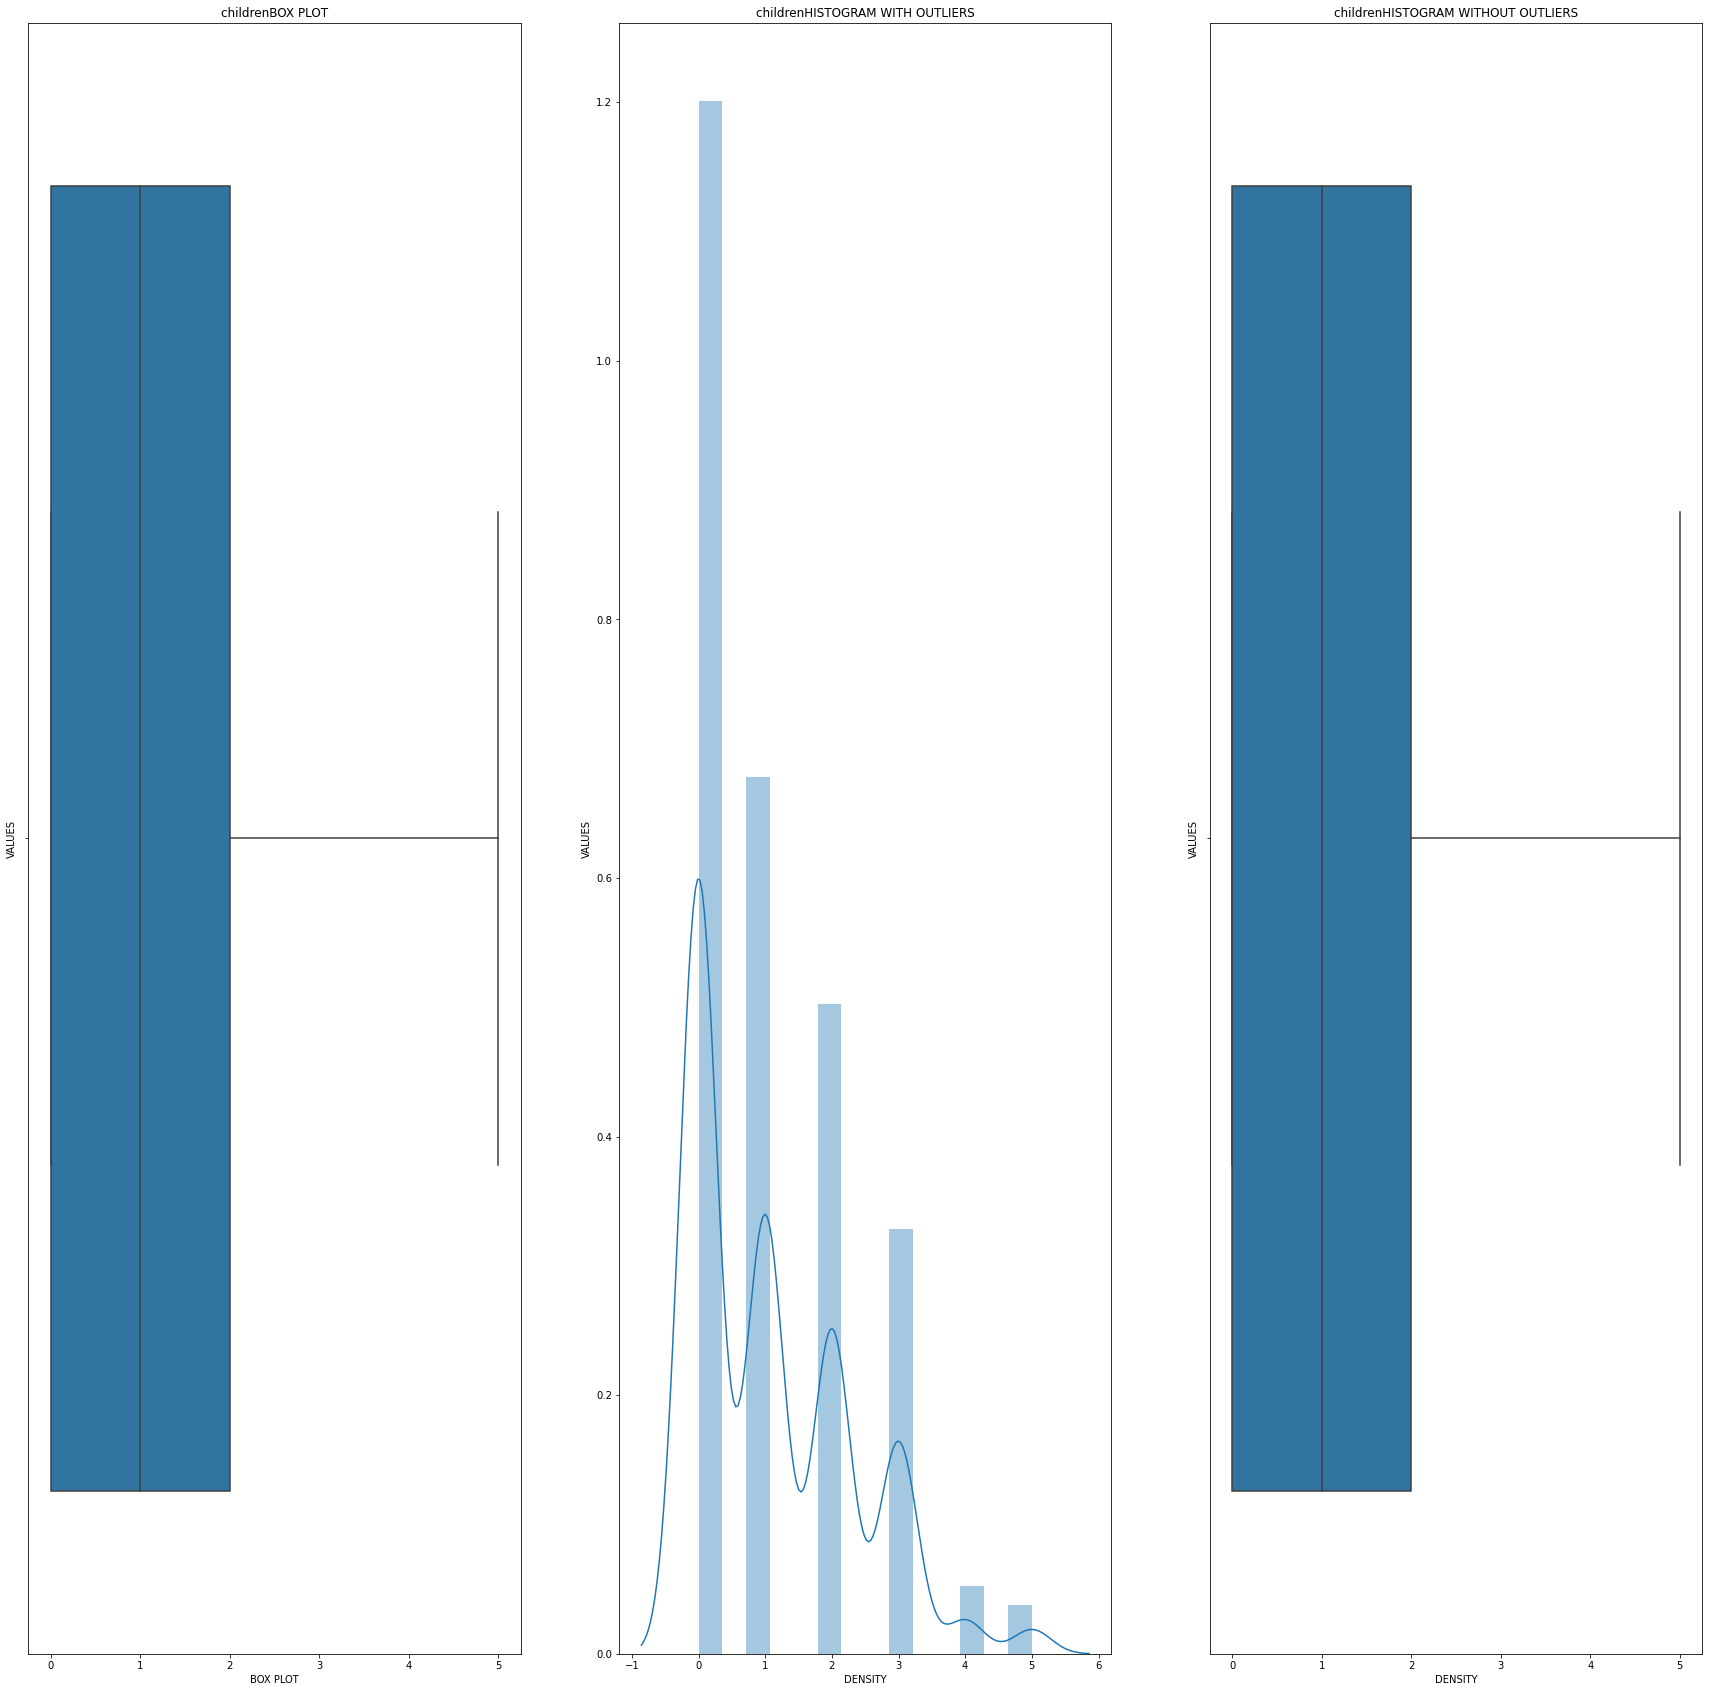

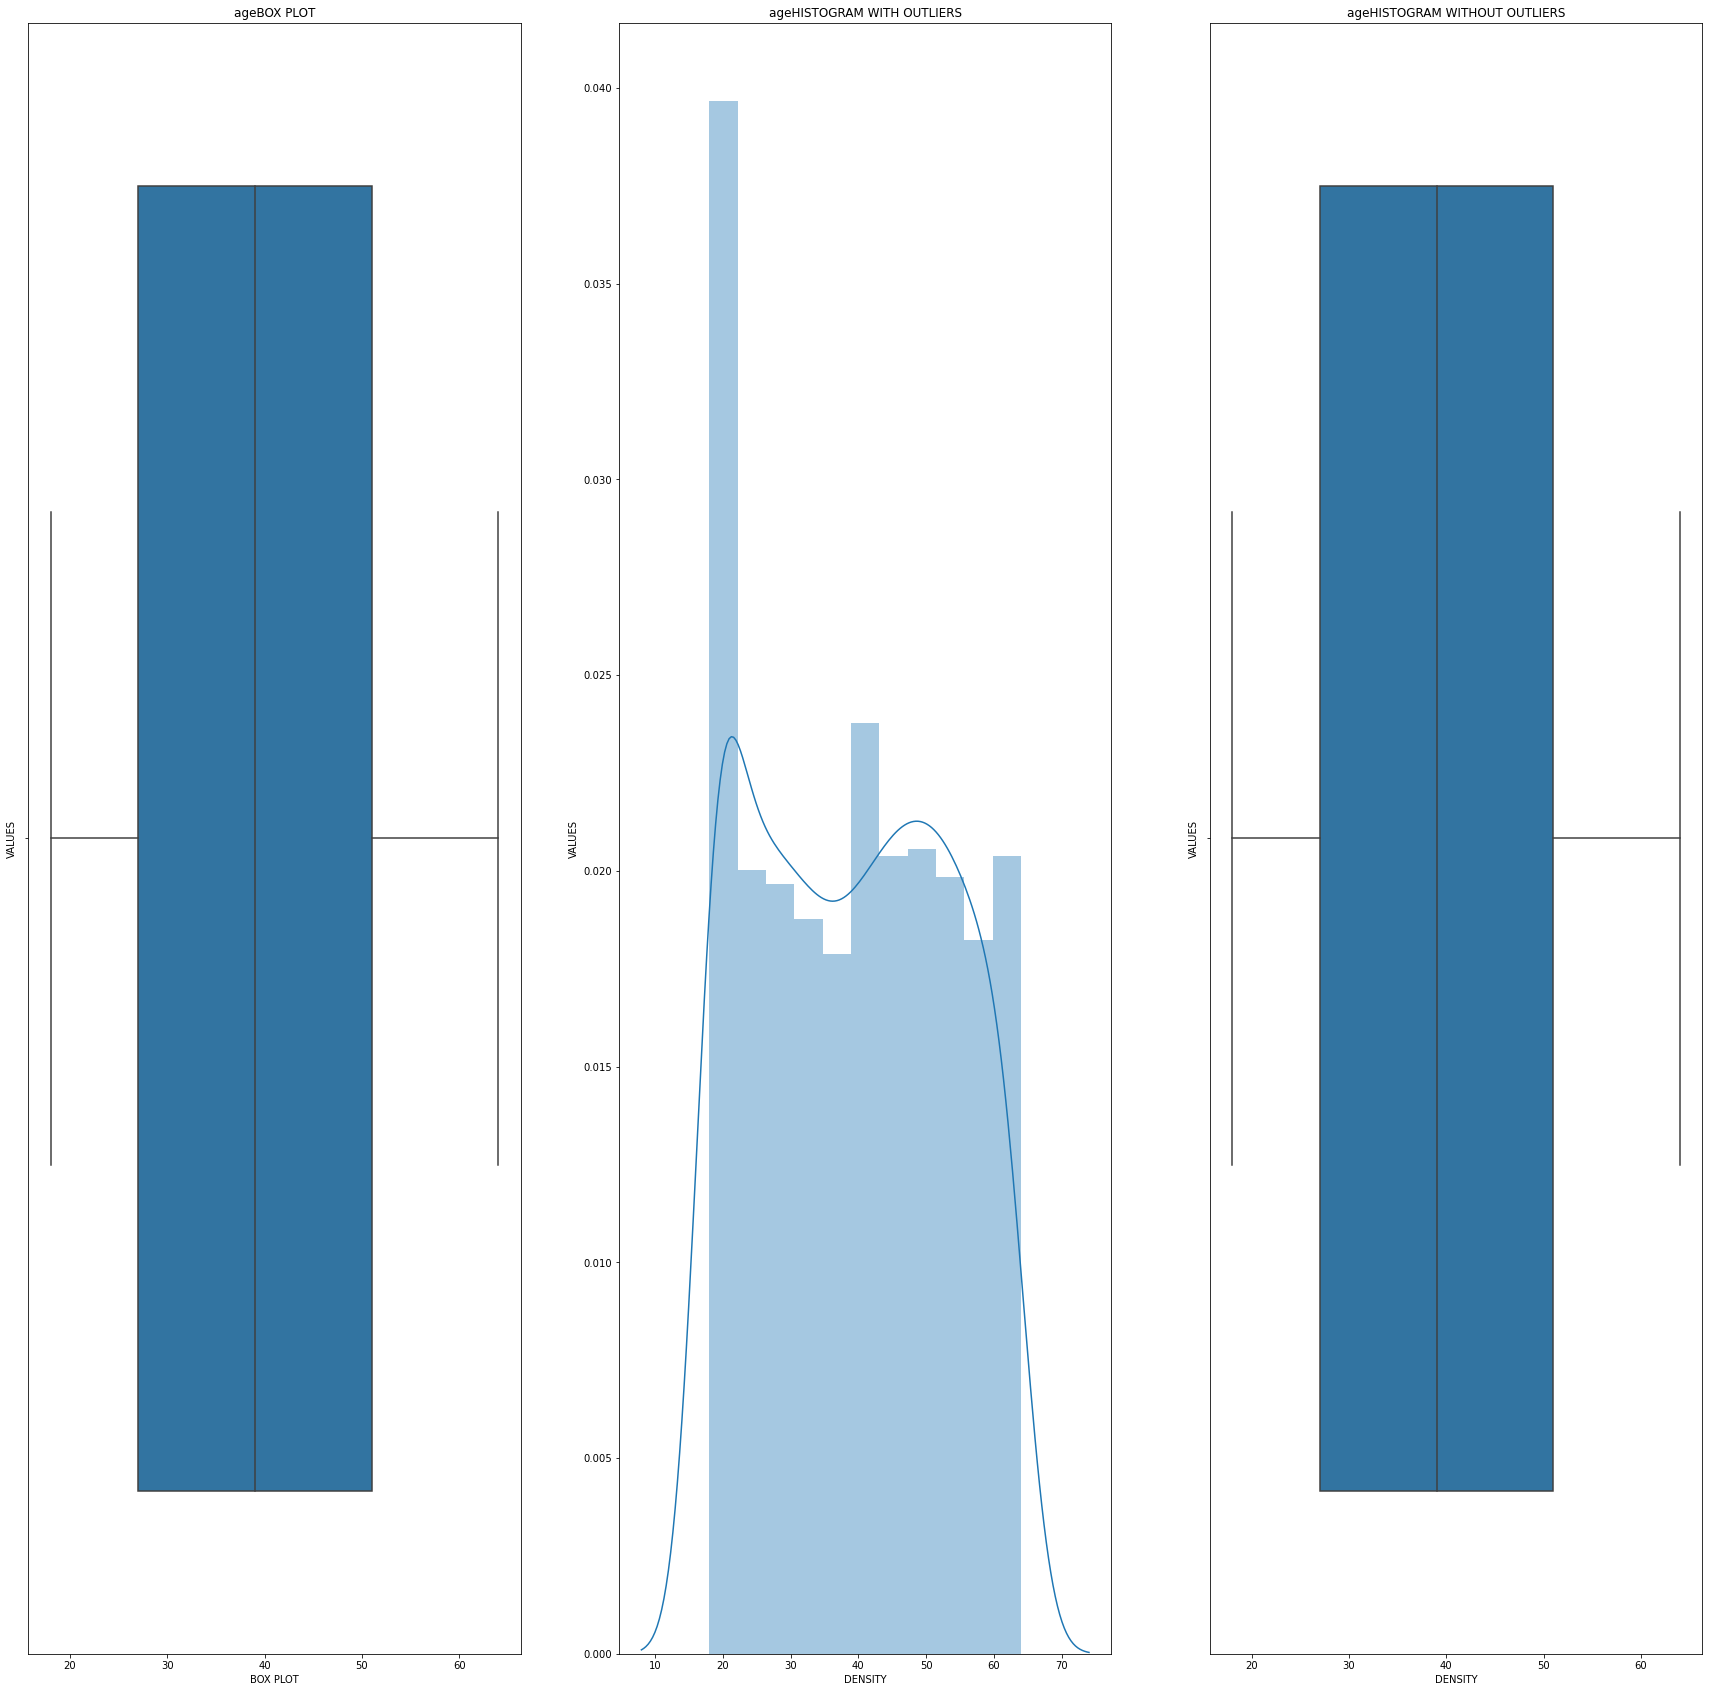

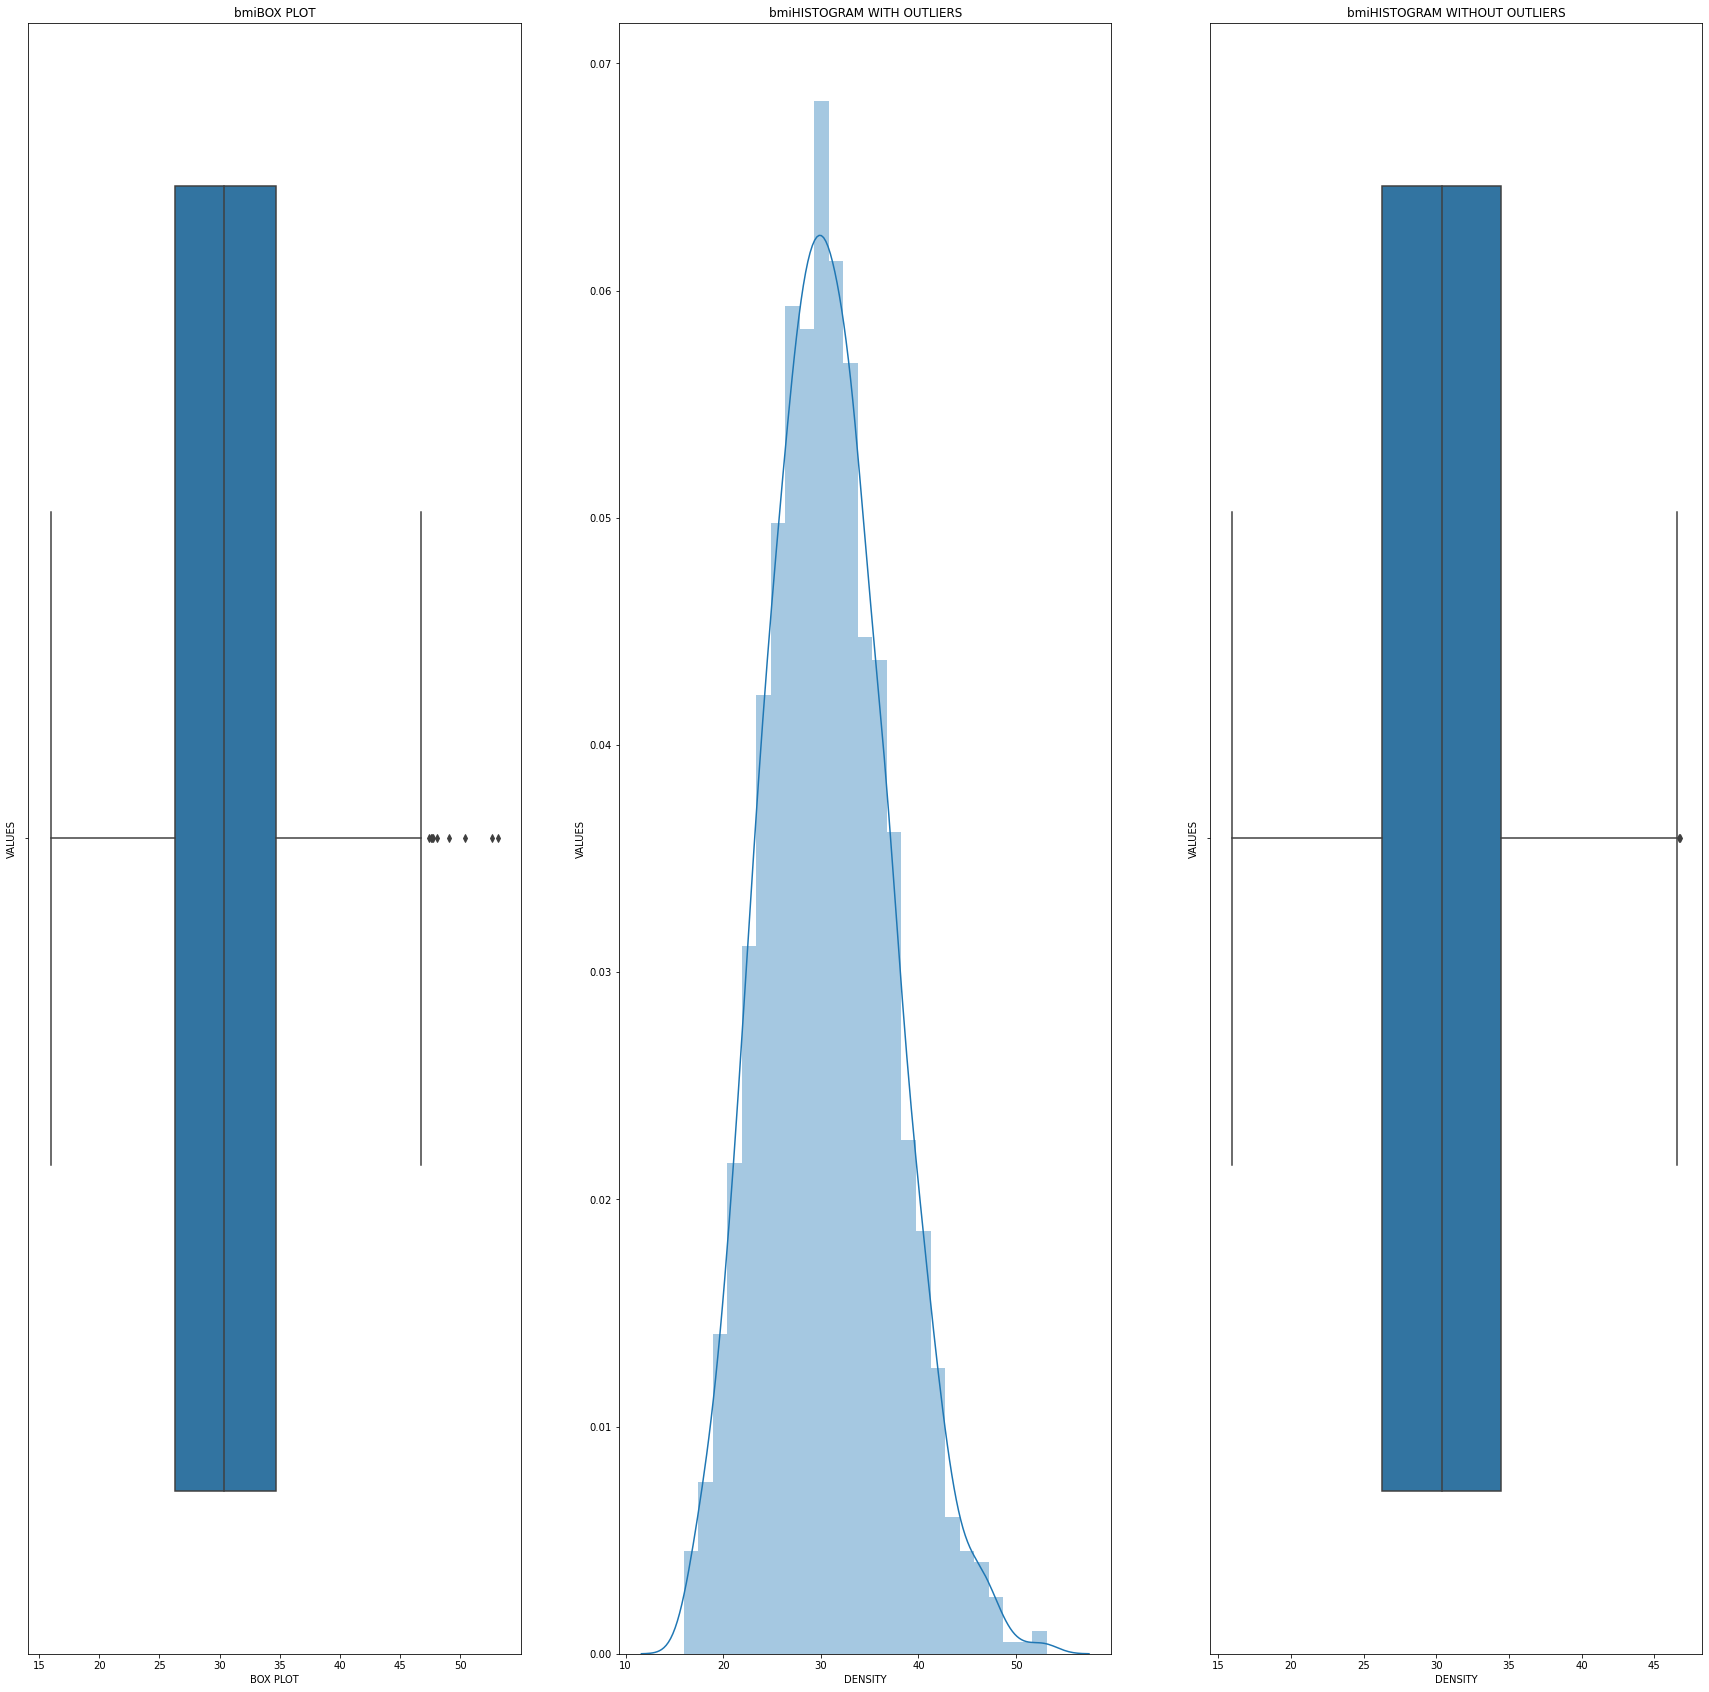

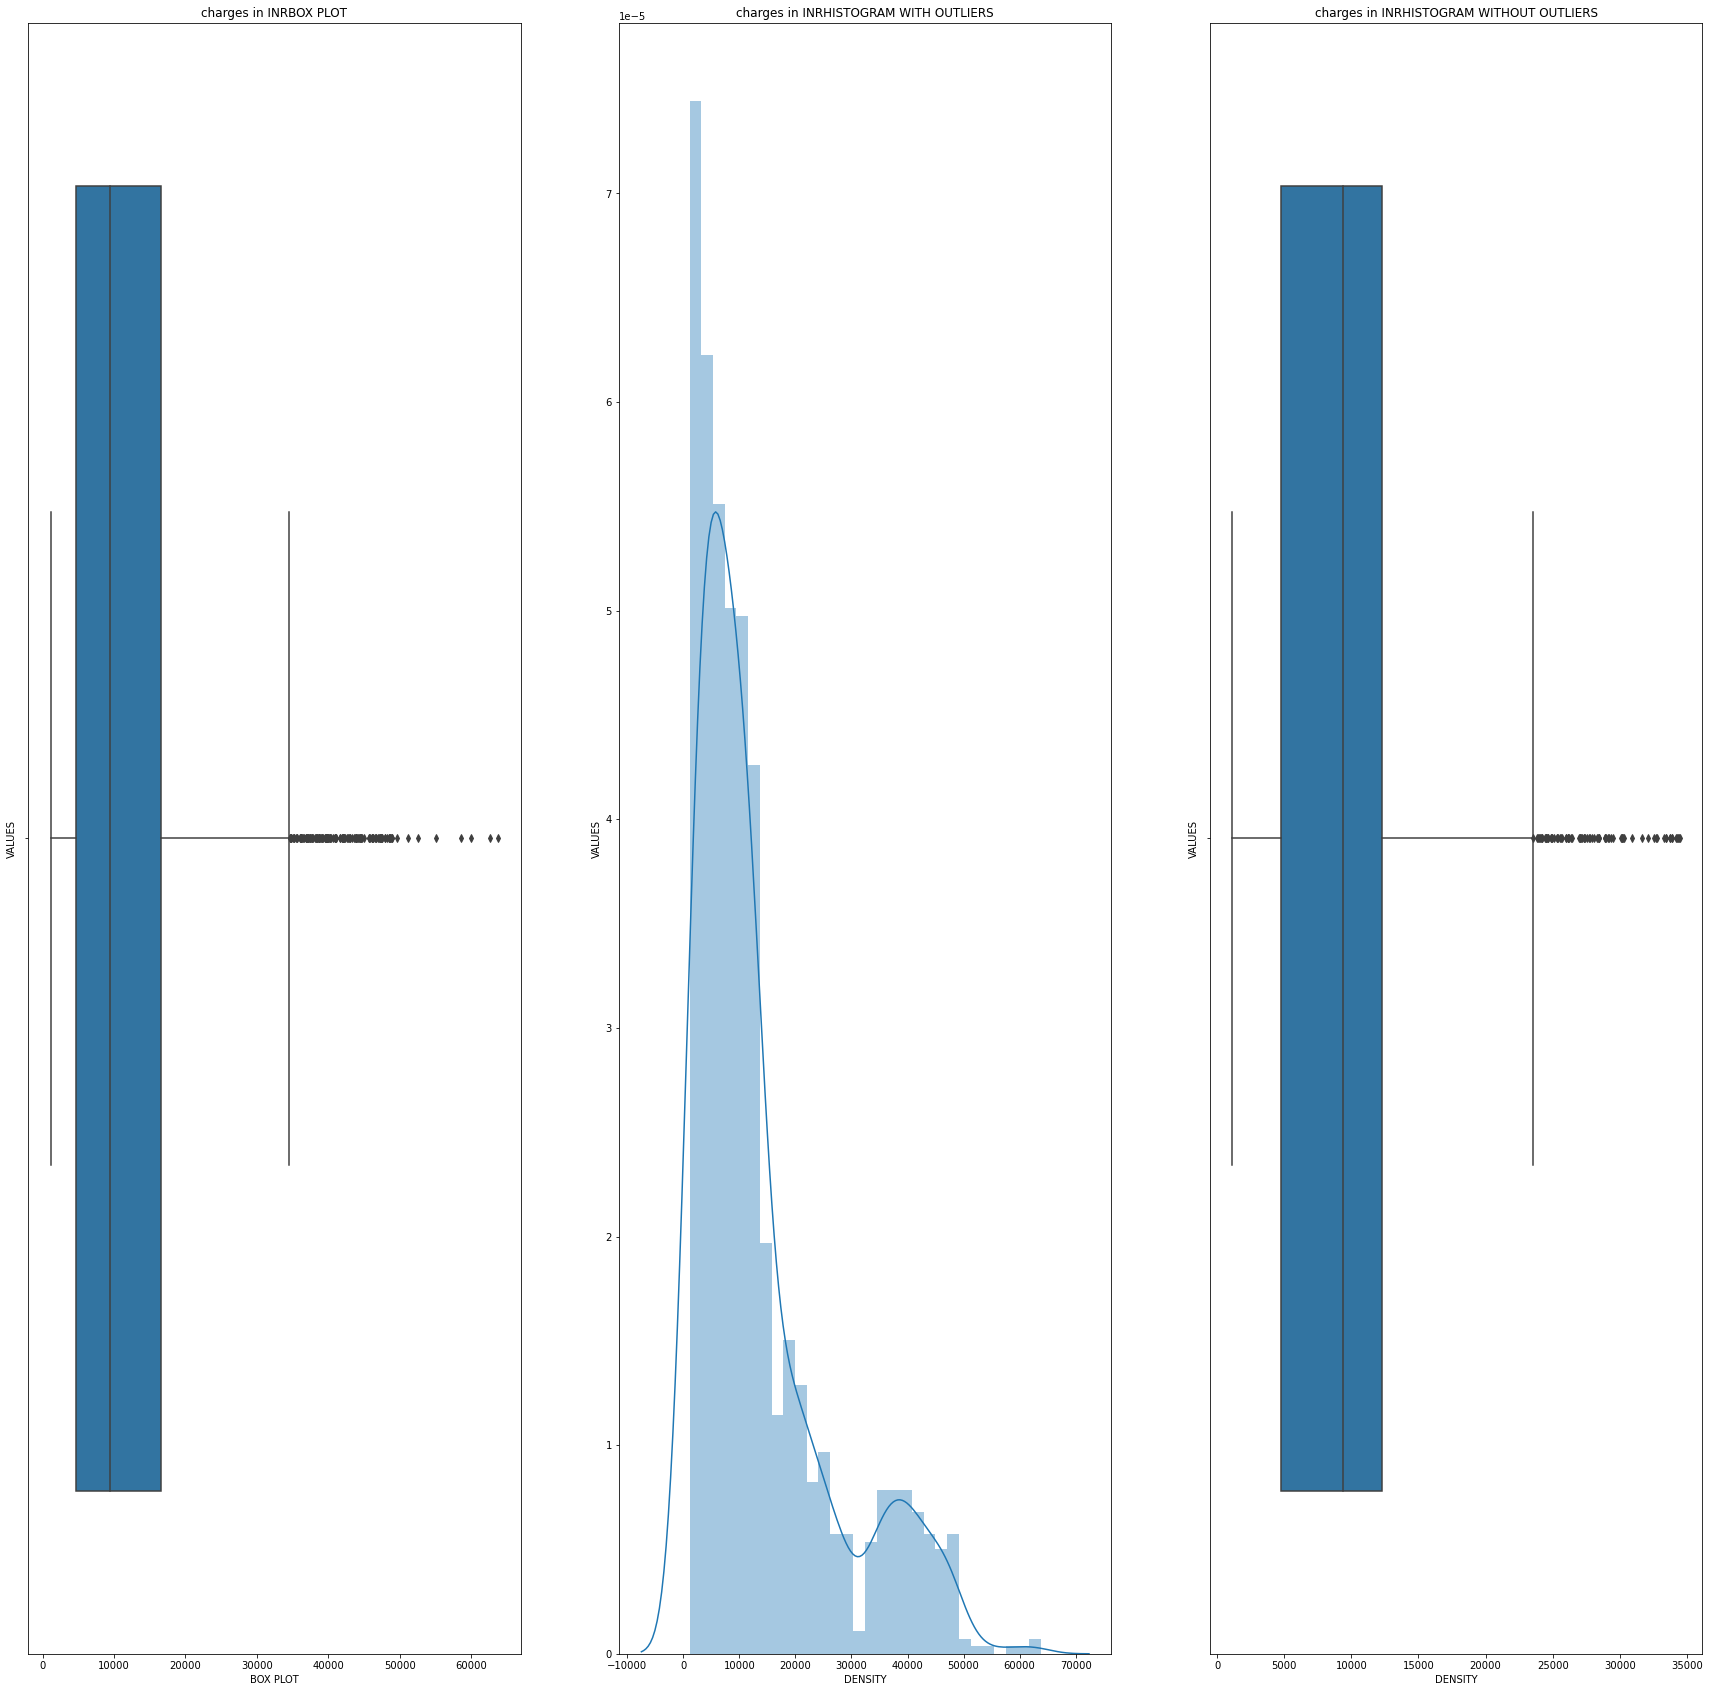

In [16]:
## plotting the graphs
for col in df.columns:
    if df[col].dtypes != object:
        odt_plots(df, col)

### Analysis on ODT Plots

1. children and age has no outliers.
2. BMI is treated and has no outlier.
3. Charges in INR still has outliers even after treating.

## Again treating Charges in INR for Outliers 

<AxesSubplot:xlabel='charges in INR'>

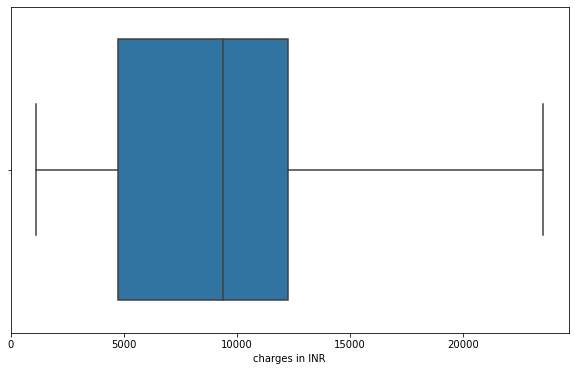

In [17]:
col = 'charges in INR'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
df.loc[df[col] < lower_limit, col] = lower_limit
df.loc[df[col] > upper_limit, col] = upper_limit
plt.figure(figsize= (10,6))
sns.boxplot(df[col])

# Results after Treating Outliers 

In [18]:
def treated_odt_plots(df, col):
    f,(ax1, ax2) = plt.subplots(1,2, figsize = (30,30))
    
    
    ## BOX PLOT
    sns.boxplot(df[col], ax = ax1)
    ax1.set_title(col + 'BOX PLOT AFTER TREATING OUTLIERS')
    ax1.set_xlabel('BOX PLOT')
    ax1.set_ylabel('VALUES')
    
    
    ## HISTOGRAM AFTER TREATING OUTLIERS 
    sns.distplot(df[col], ax = ax2)
    ax2.set_title(col + 'HISTOGRAM AFTER TREATING OUTLIERS')
    ax2.set_xlabel('DENSITY')
    ax2.set_ylabel('VALUES')
    

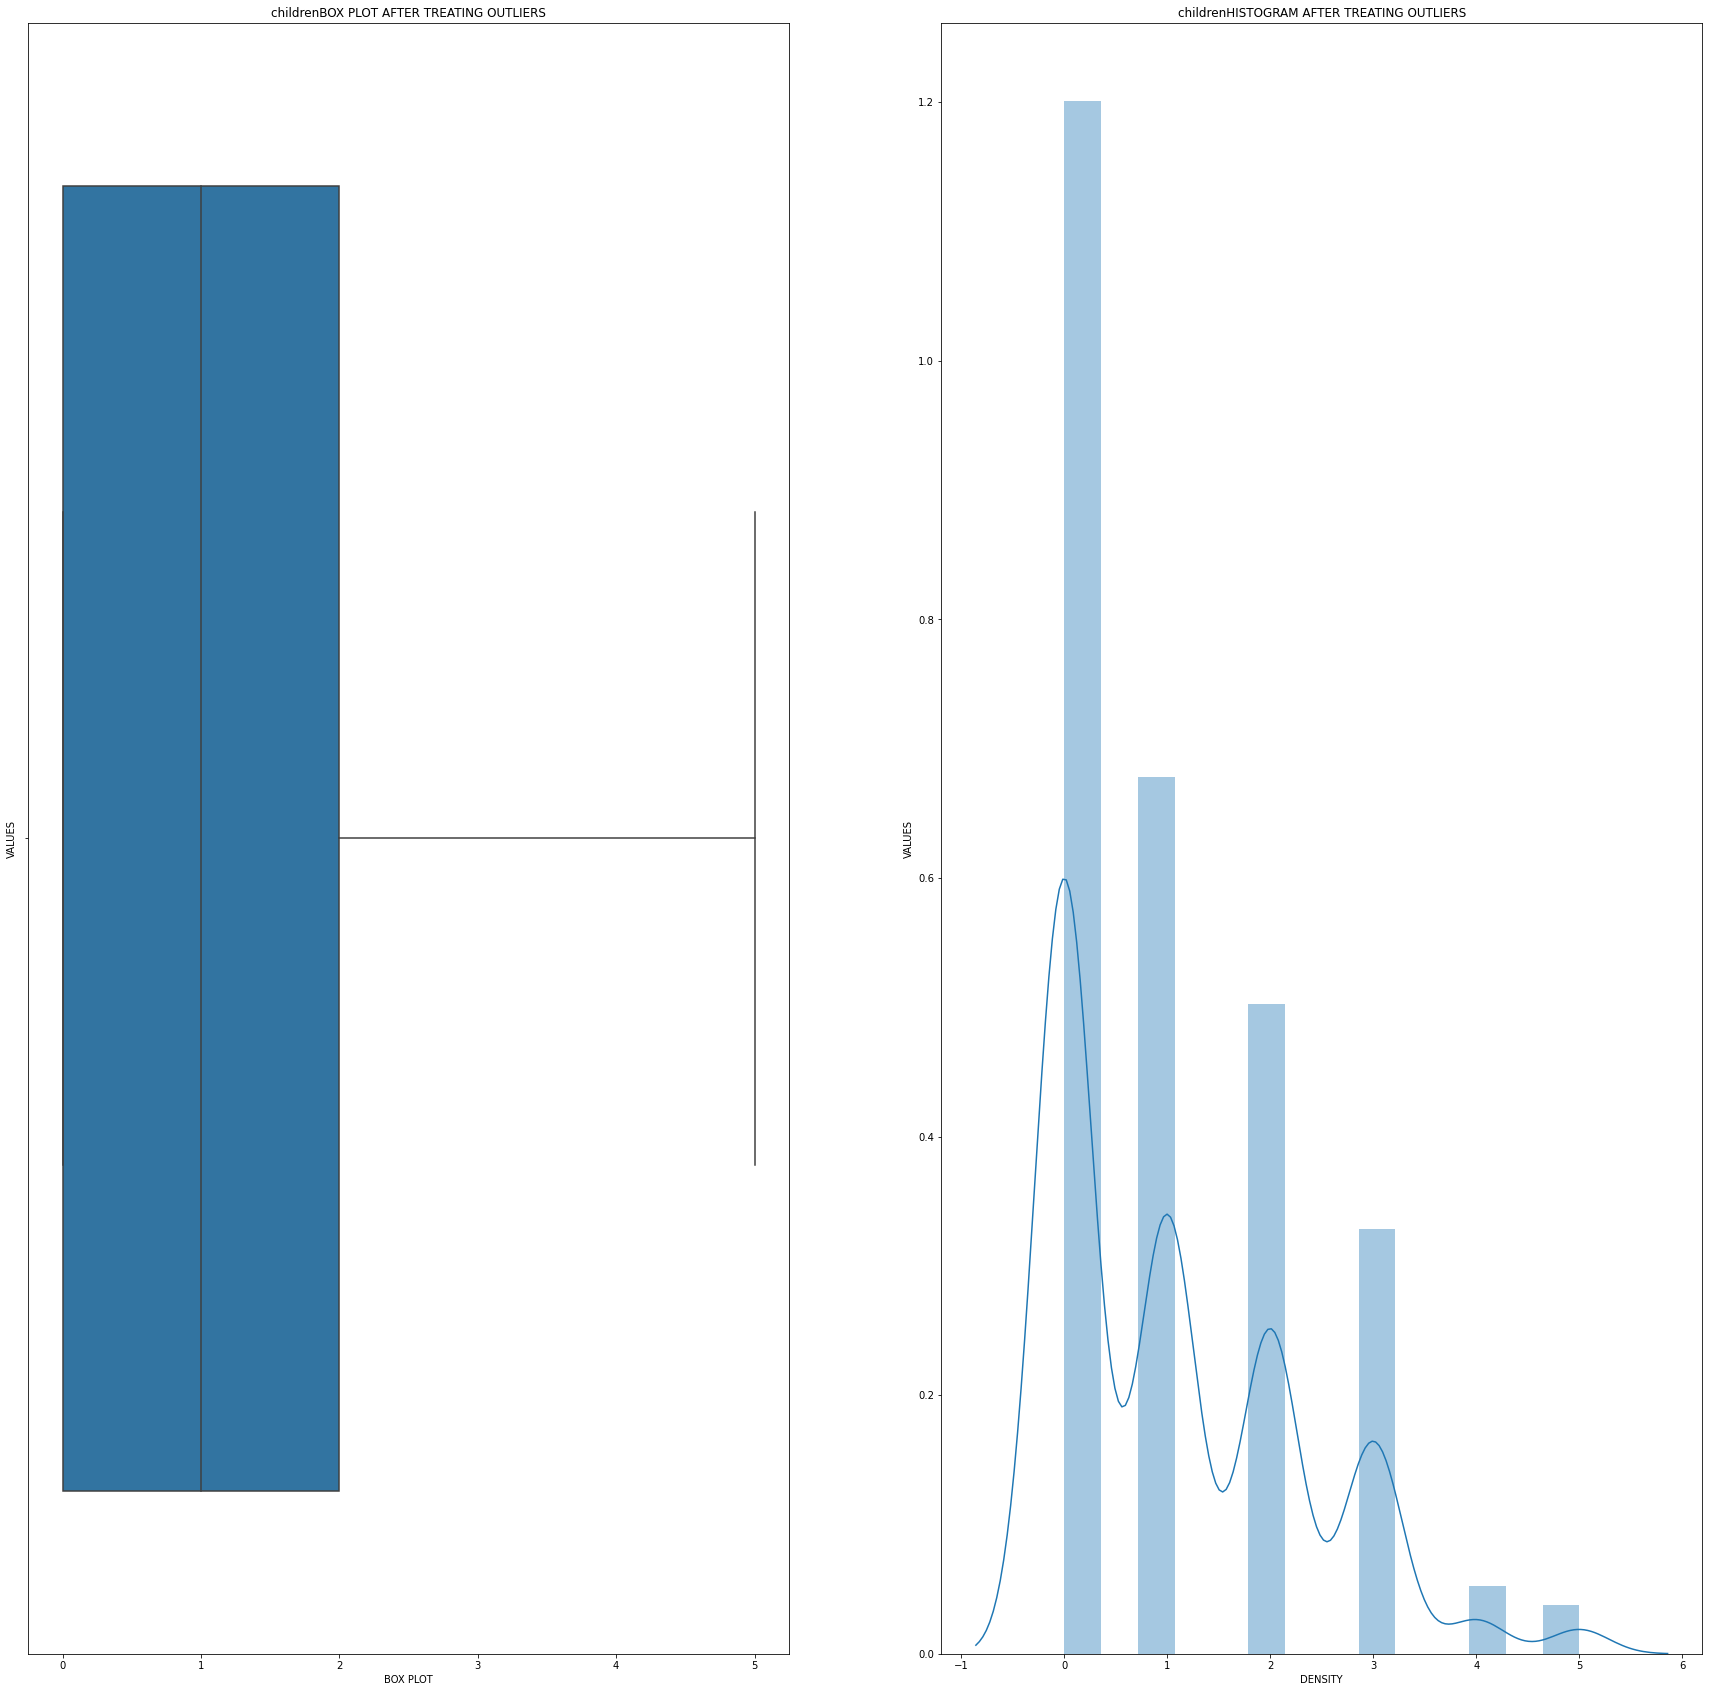

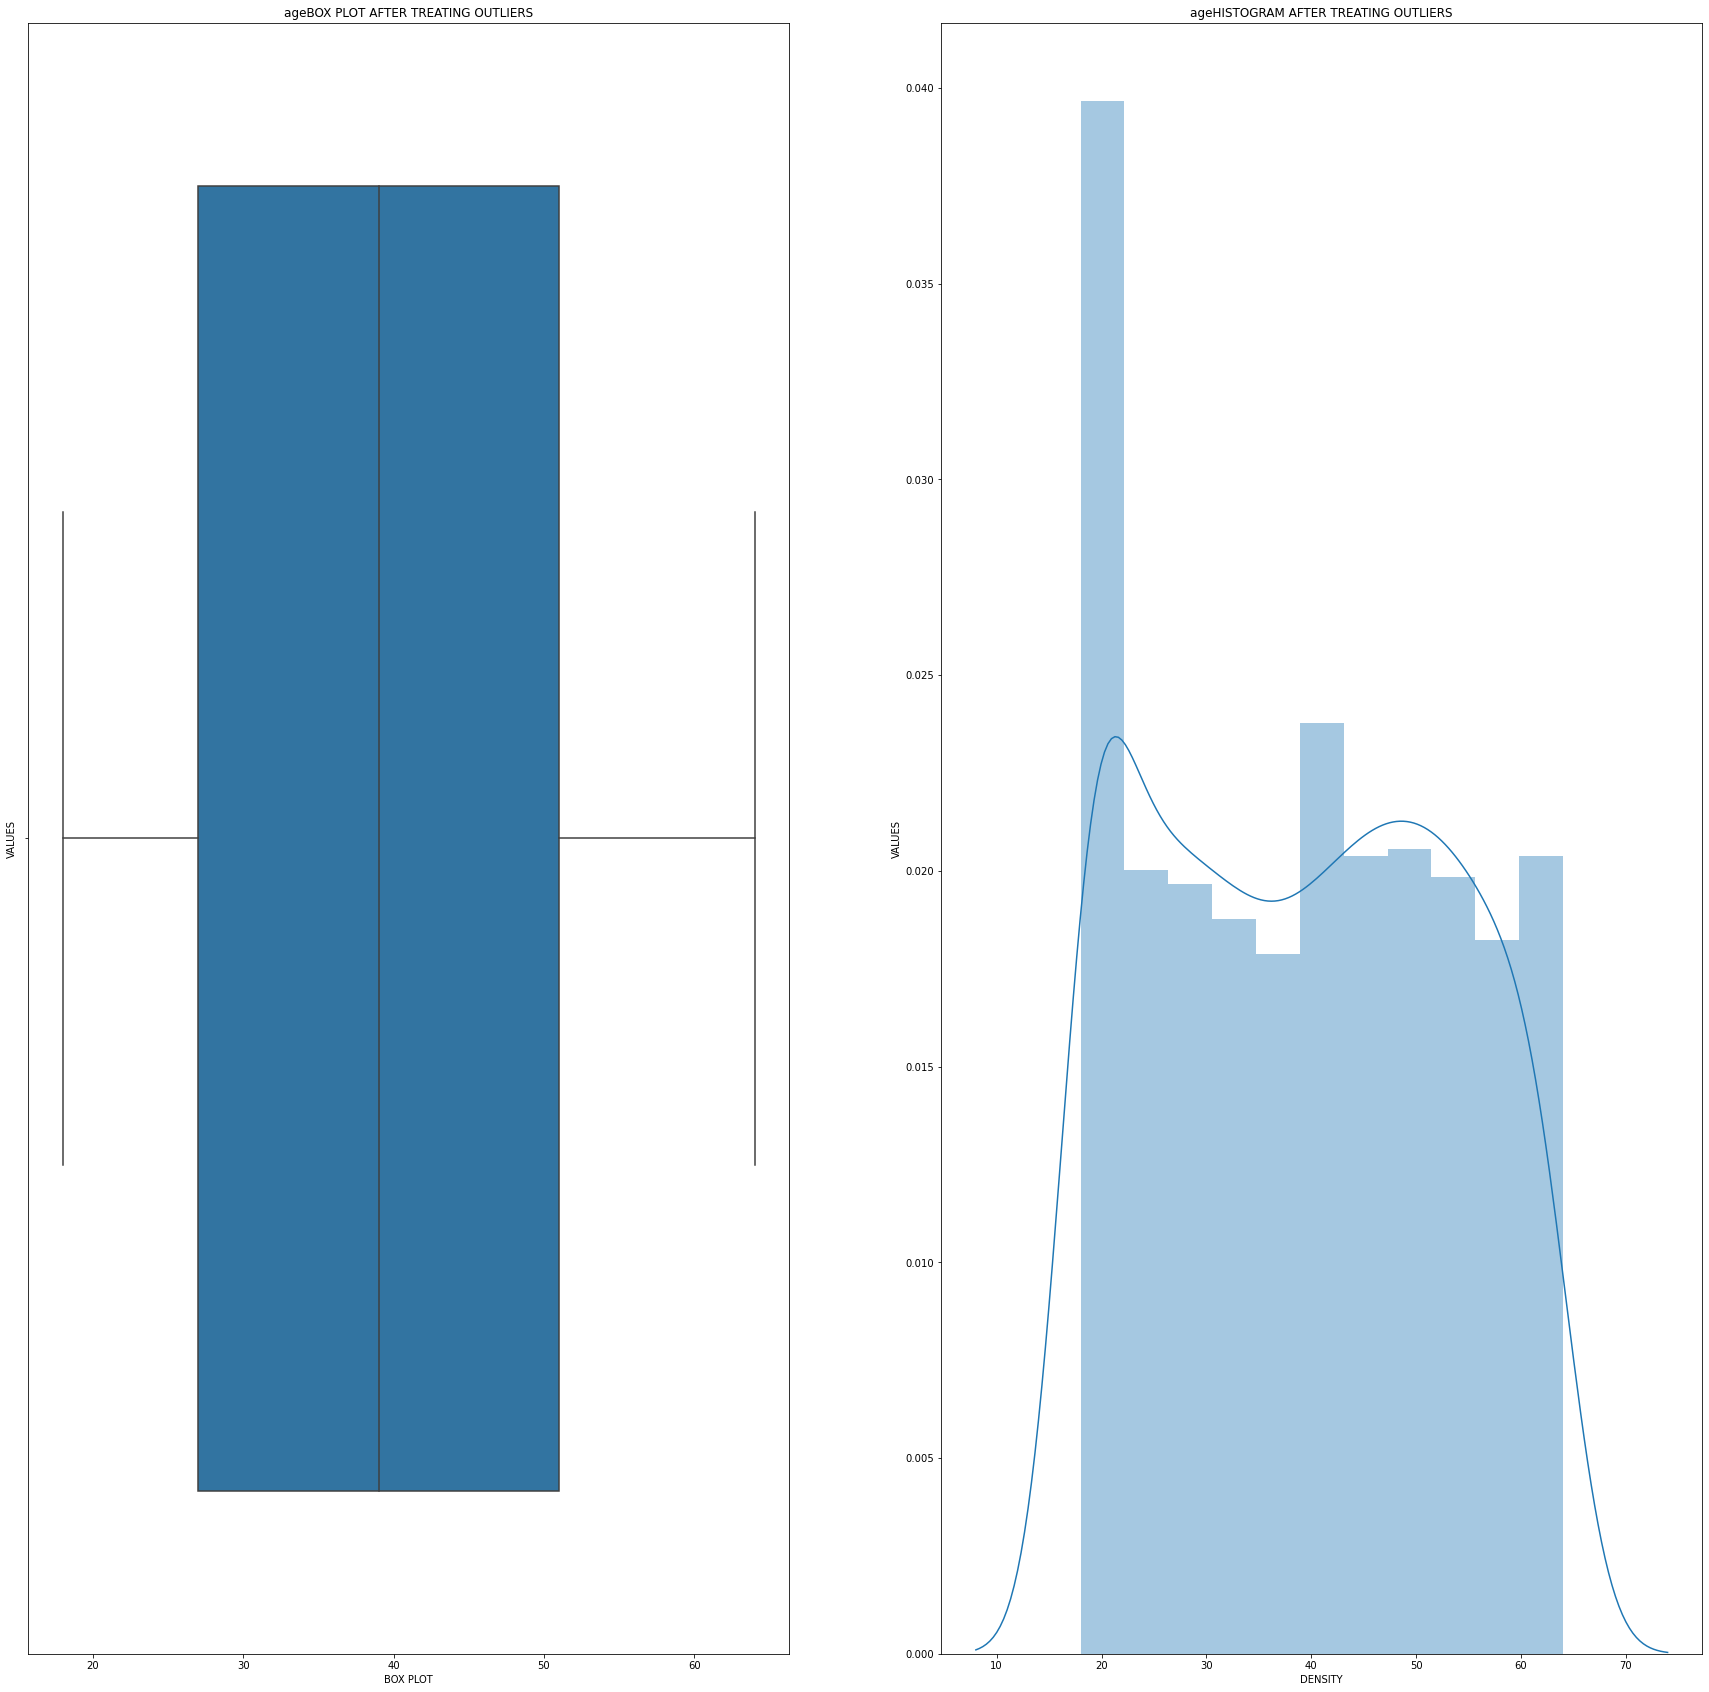

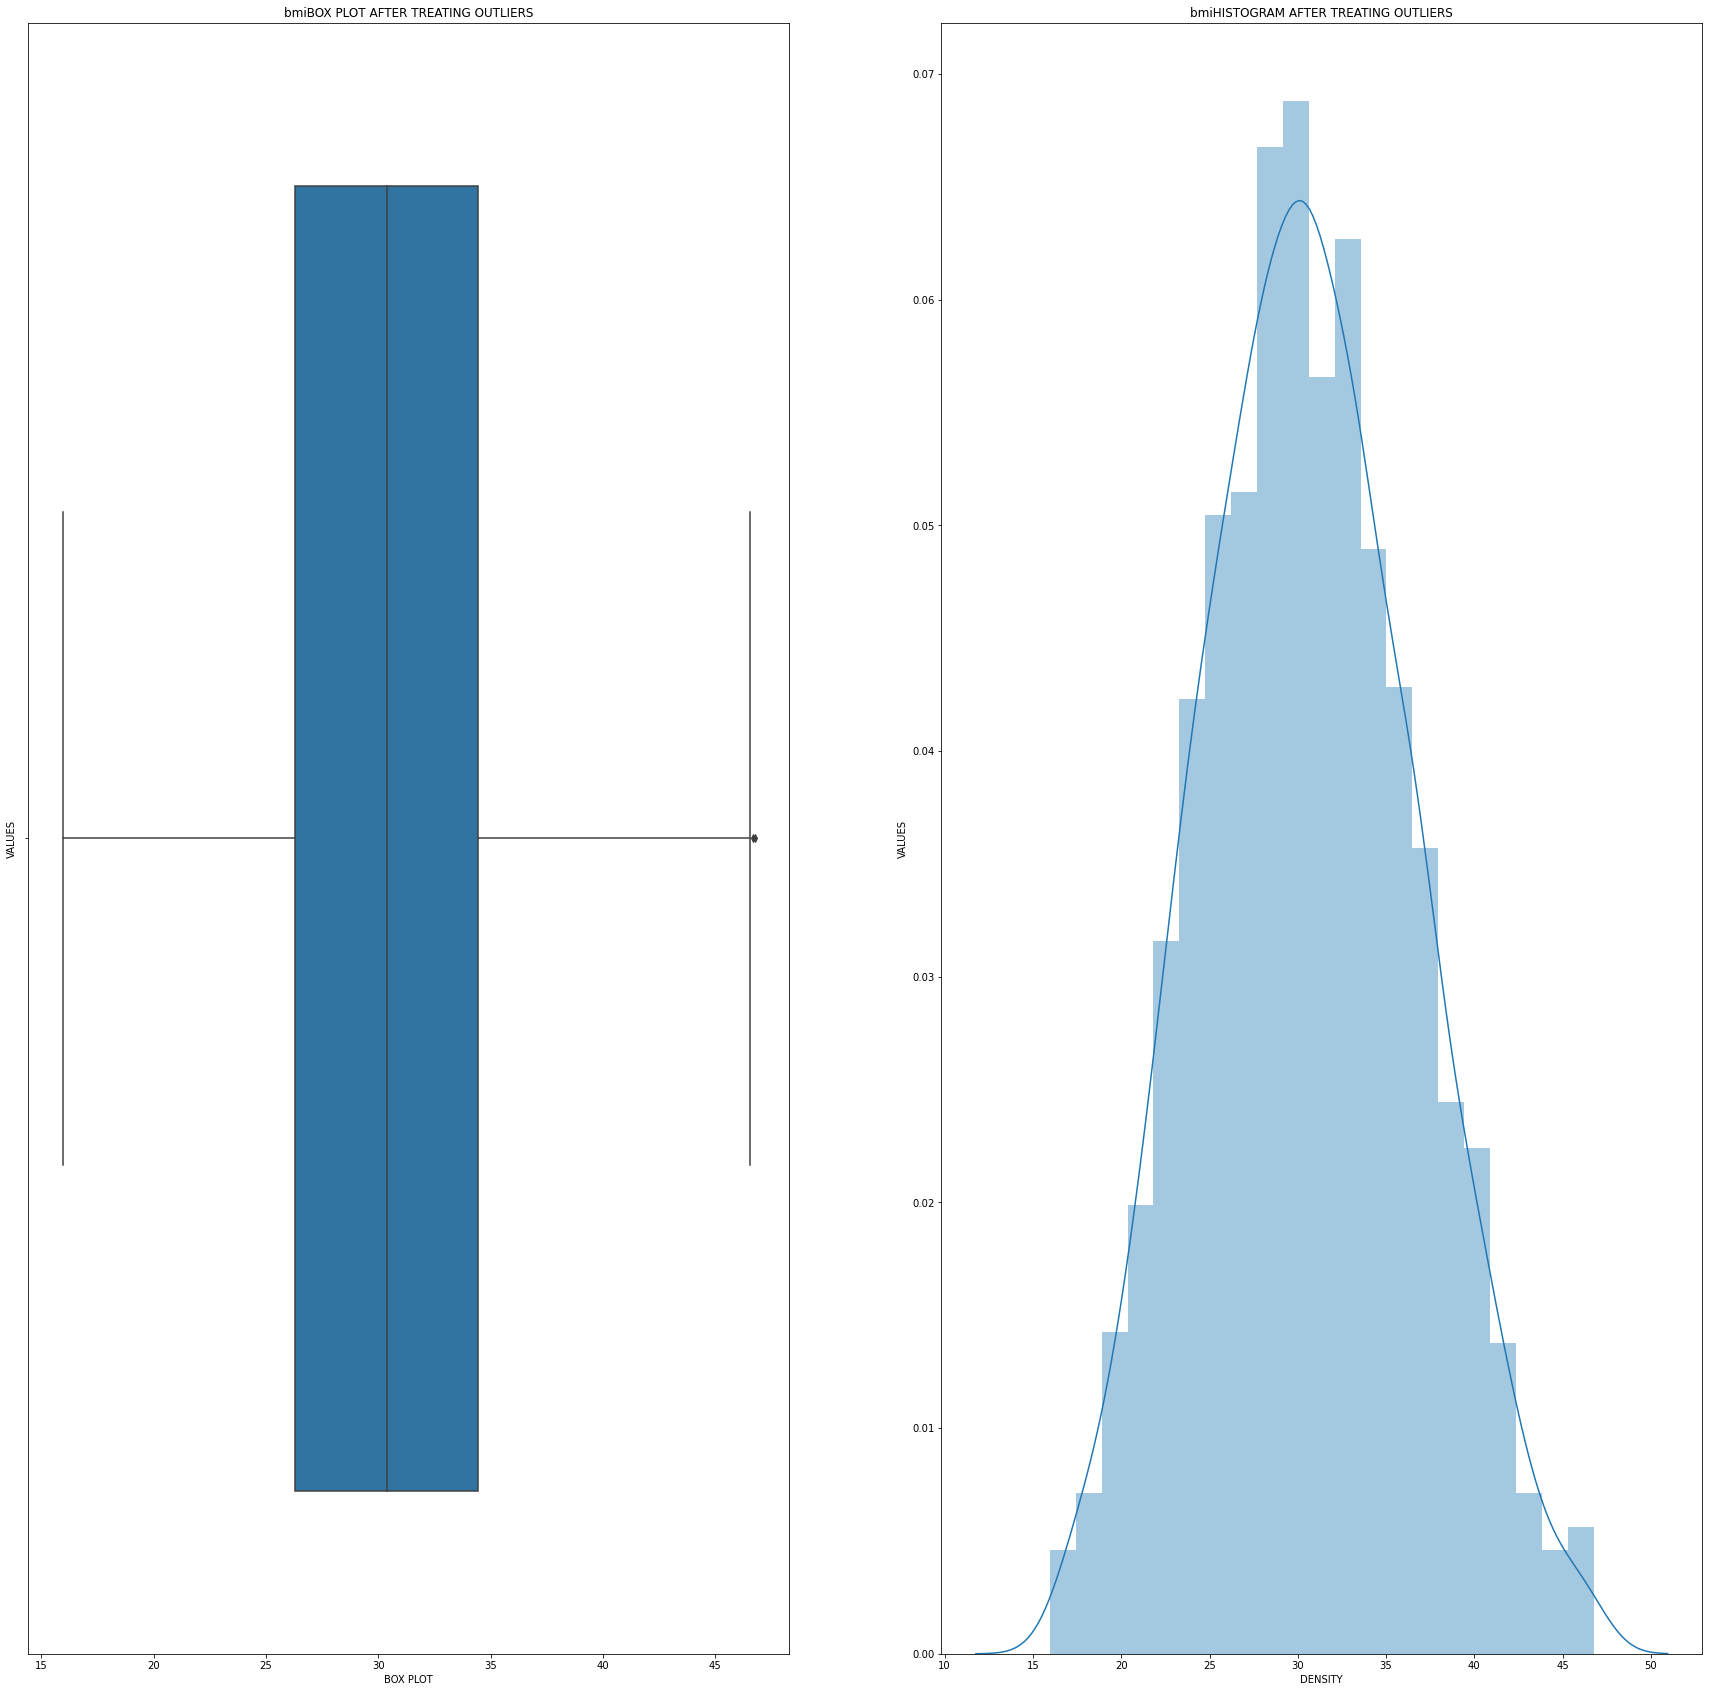

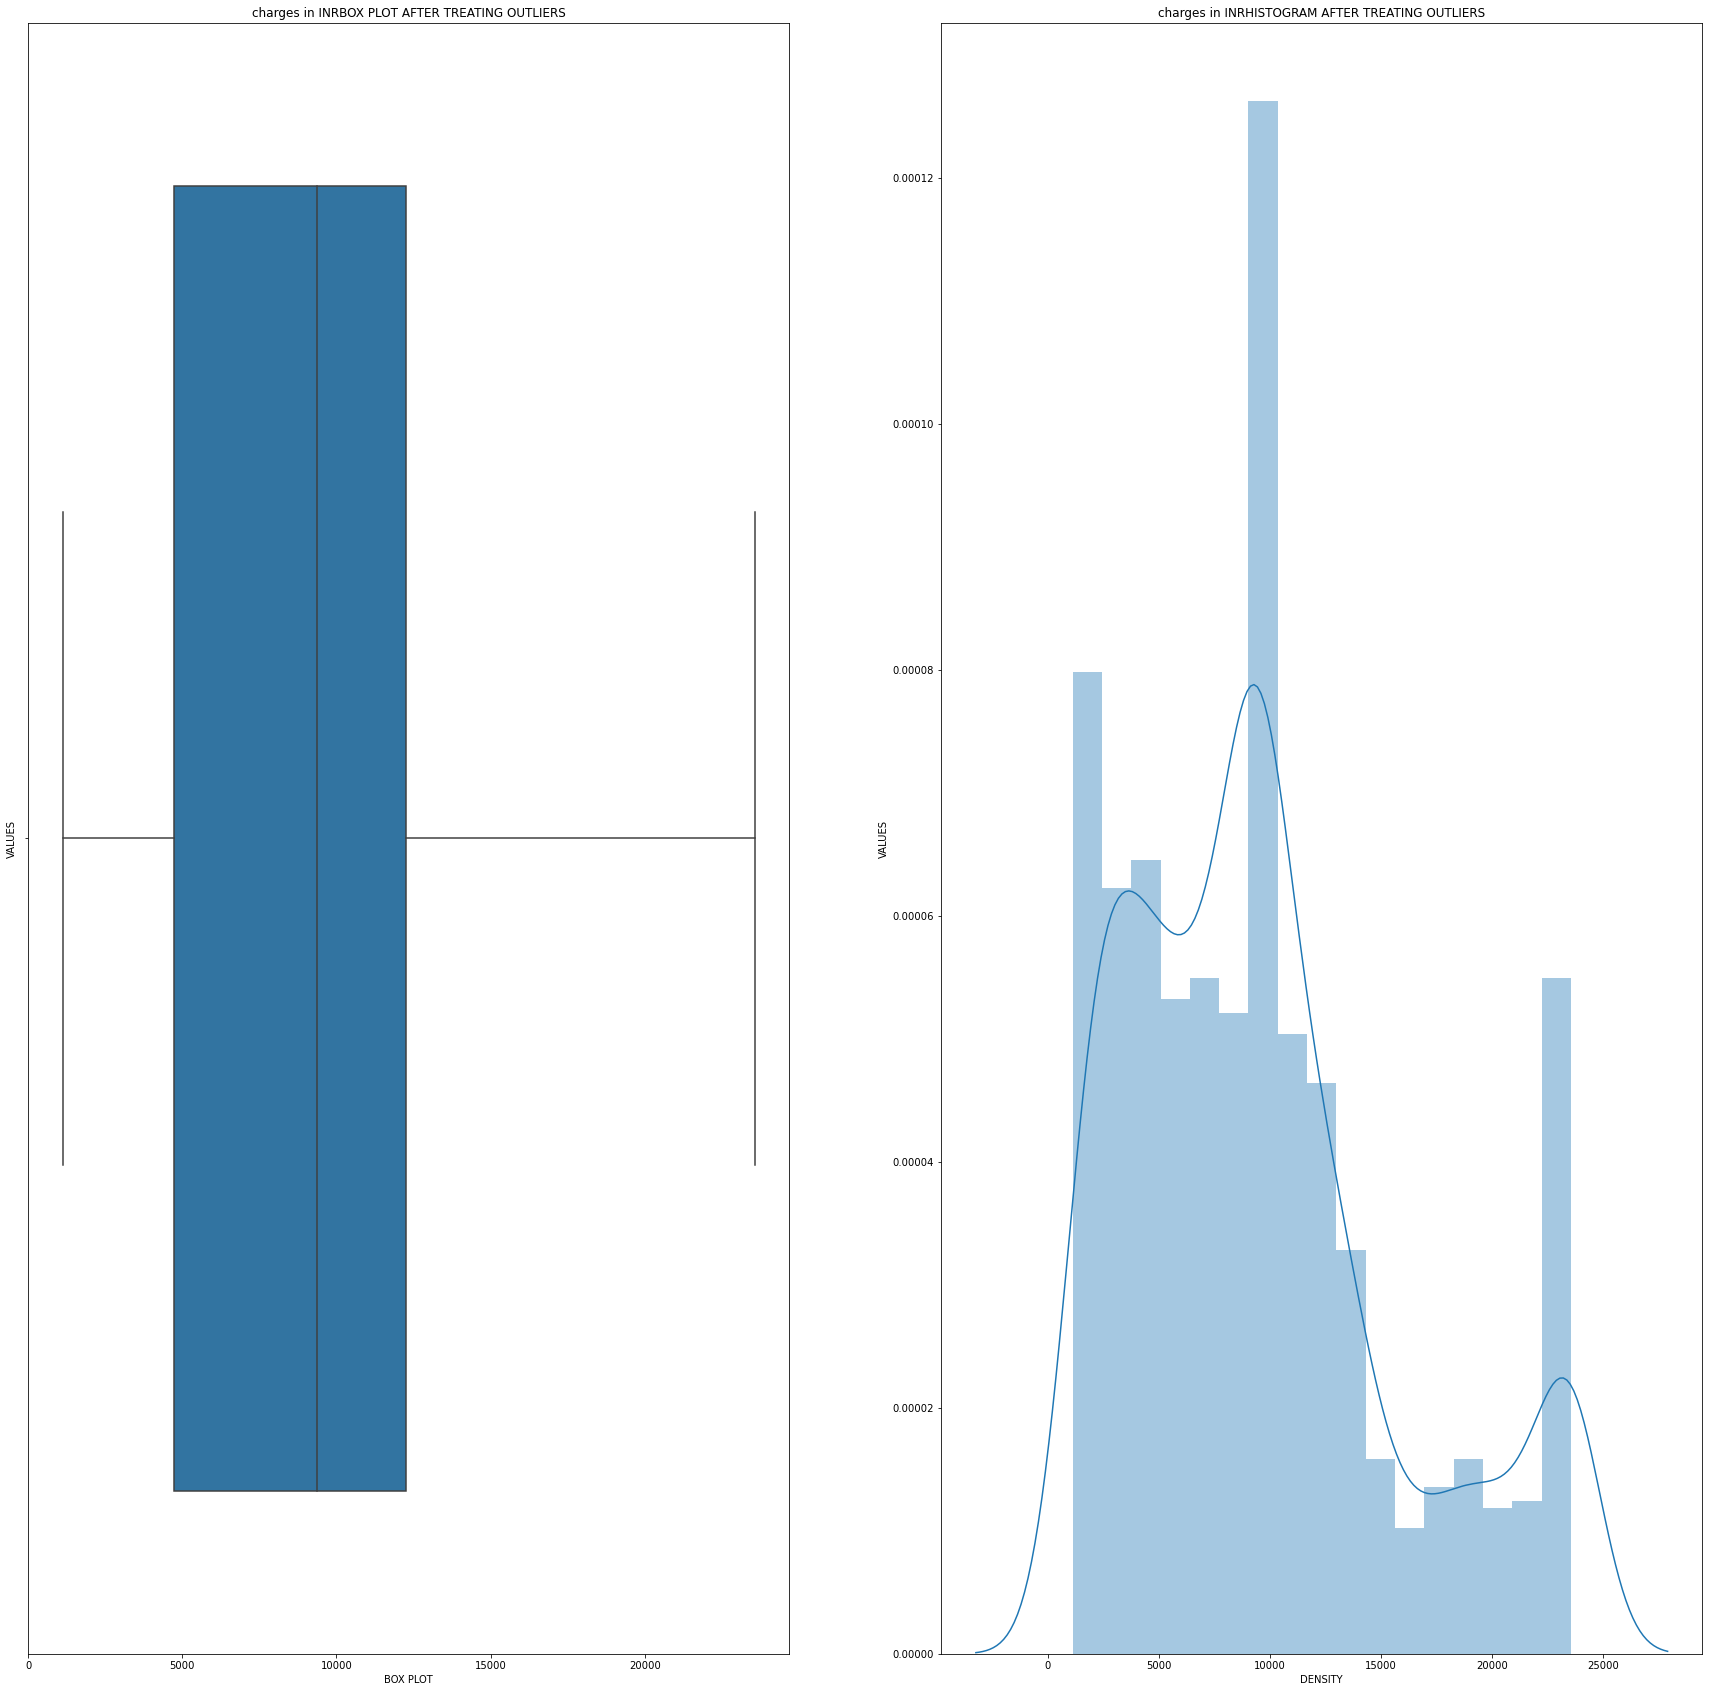

In [19]:
## plotting the graphs
for col in df.columns:
    if df[col].dtypes != object:
        treated_odt_plots(df, col)

# Label Encoding 

In [20]:
le = LabelEncoder()

In [21]:
df['smoker'] = le.fit_transform(df['smoker']) ## 0 --> no          1 --> yes
df['sex'] = le.fit_transform(df['sex']) ## male --> 1      female --> 0

In [22]:
df

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,0,southwest,23,1,34.400,1826.84300
1,PLC157033,1,0,southwest,19,1,24.600,1837.23700
2,PLC157060,0,0,southwest,56,1,40.300,10602.38500
3,PLC157087,1,0,southwest,30,0,32.400,4149.73600
4,PLC157186,5,0,southwest,19,0,28.600,4687.79700
...,...,...,...,...,...,...,...,...
1333,PLC168400,1,1,northeast,39,1,29.925,22462.04375
1334,PLC168436,0,1,northeast,18,0,21.660,14283.45940
1335,PLC168634,2,1,northeast,42,1,24.605,21259.37795
1336,PLC168652,0,1,northeast,29,0,21.850,16115.30450


# One Hot Encoding  

In [23]:
# ohe = pd.get_dummies(df['region'])
# ohe

In [24]:
## merging ohe to dataset
# df[['northeast_ohe', 'northwest_ohe', 'southeast_ohe', 'southwest_ohe']] = ohe
# df

### Dropping Unwanted Columns 

In [25]:

df = df.drop(['Policy no.', 'region'], axis = 1)

## Multi-Variate Analysis

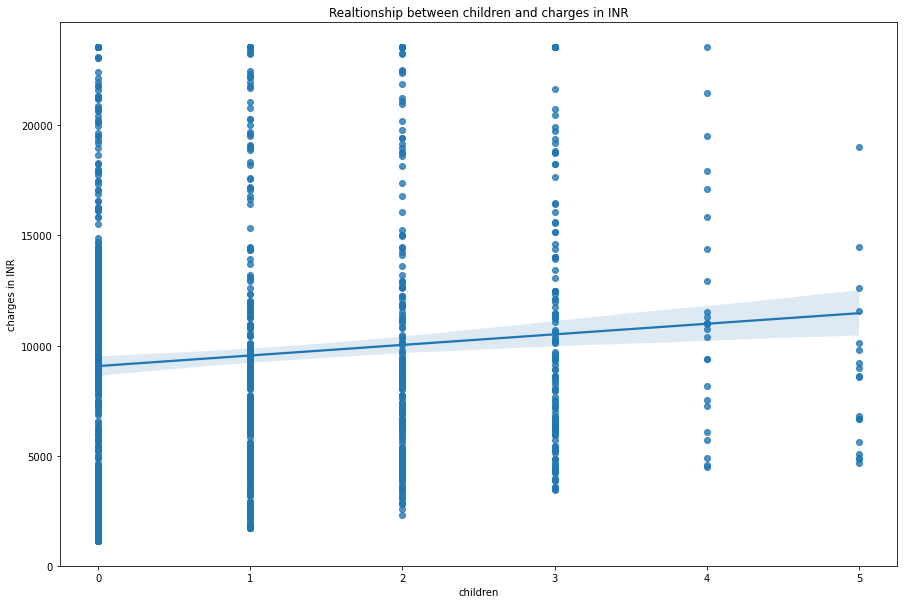

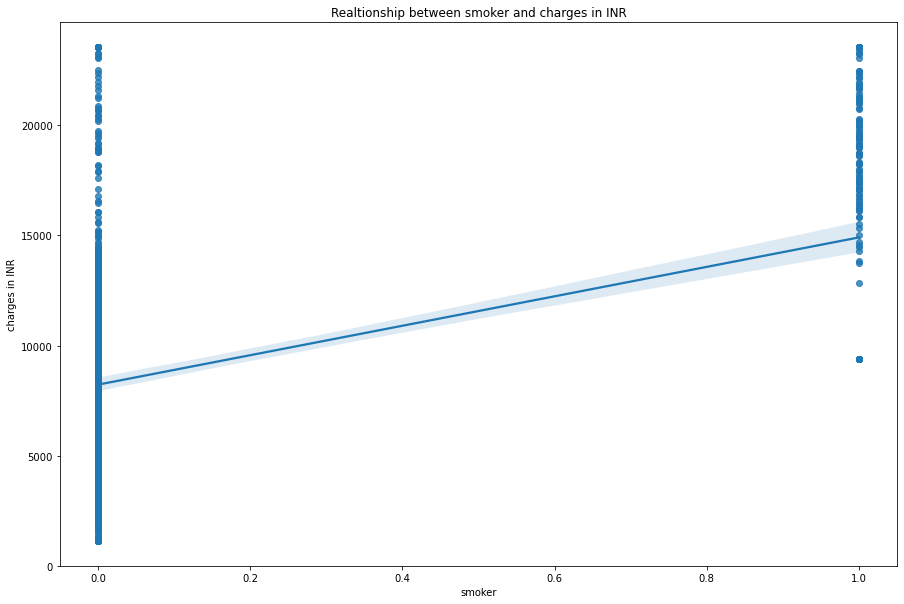

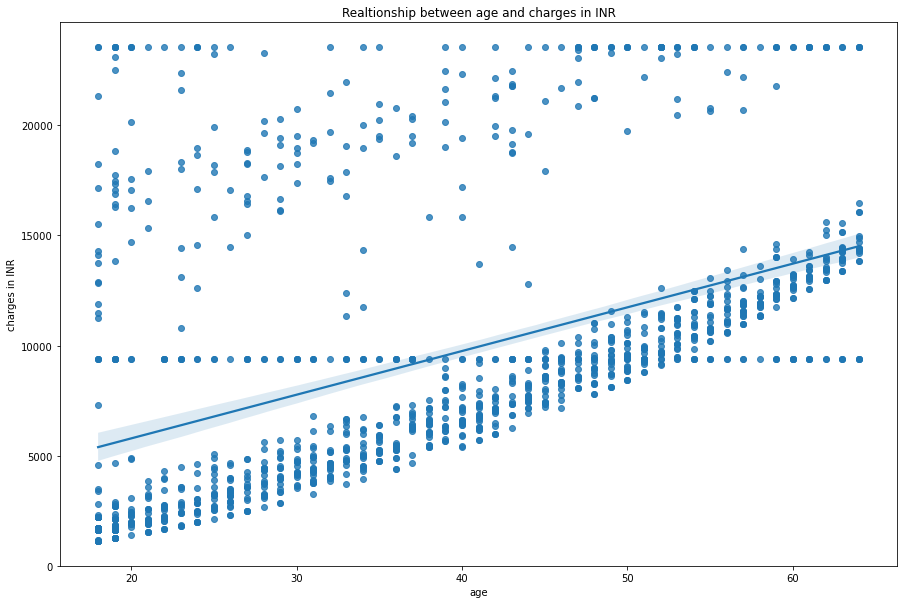

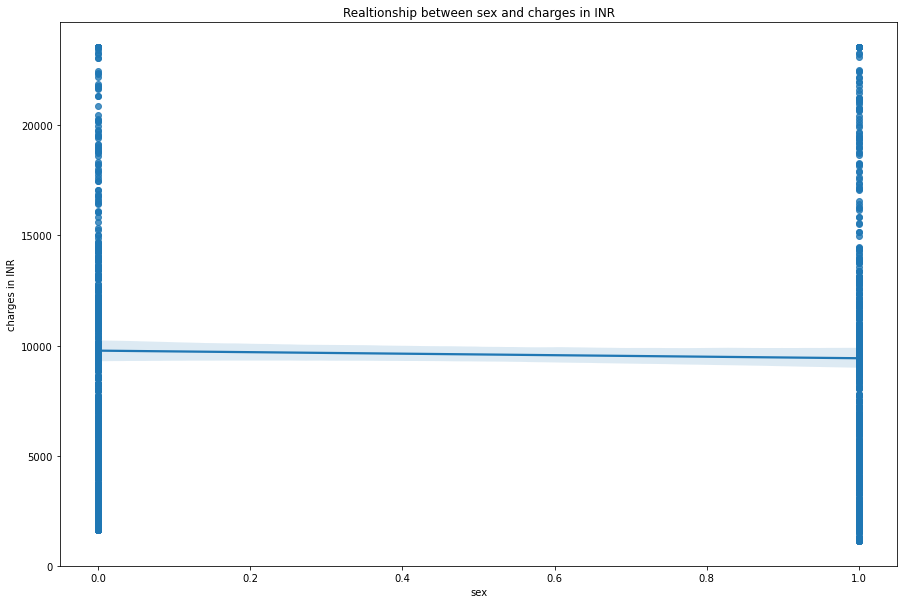

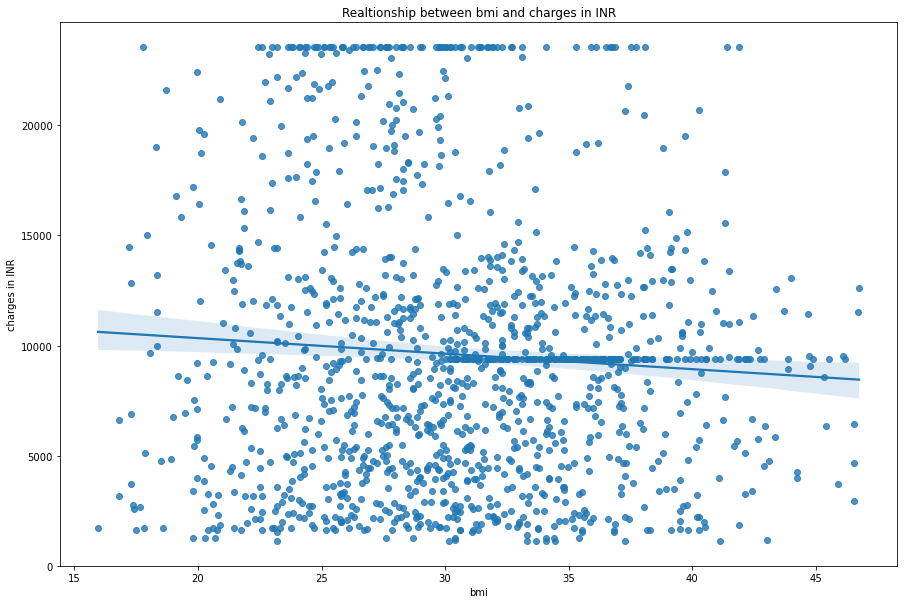

In [26]:
for col in df.columns:
    if df[col].dtype != object:
        if col != 'charges in INR':
            f, ax1 = plt.subplots(figsize = (15, 10))
            sns.regplot(x = df[col], y= df['charges in INR'], ax = ax1)
            ax1.set_title(f'Realtionship between {col} and charges in INR')

### Analysis Result

1. Children and Charges in INR have slightly +ve coorelation. 
2. Smoker and Charges in INR are highly +ve correlated
3. Age and Charges in INR are highly +ve Correlated.
4. Bmi and Charges in INR have slightly -ve correlation.
5. Sex and Charges in INR have no collinearity.

In [27]:
def corr_target(df, target):
    ind_var = df.drop(target, axis = 1).columns
    corr_result = []
    for col in ind_var:
        
        corr_result.append(df[target].corr(df[col]))
    result_df = pd.DataFrame([ind_var, corr_result], index = ['Variable', 'Co-Realtion']).T ## T is for transpose
    
    
    return result_df.sort_values('Co-Realtion', ascending = False)

In [28]:
corr_target(df, 'charges in INR')

,Variable,Co-Realtion
2,age,0.455223
1,smoker,0.440786
0,children,0.094546
3,sex,-0.028131
4,bmi,-0.067854


### Analysis

1. AGE>SMOKER>CHILDREN>BMI>SEX

# Multi-Colinearity

<AxesSubplot:>

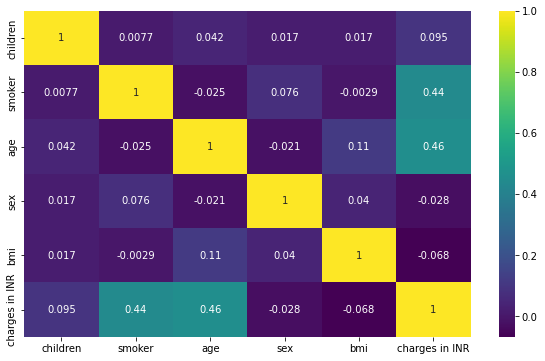

In [29]:
corr = df.corr()
f, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, annot= True, cmap='viridis')

### Analysis of Multi-Colinearity

1. Age and charges in INR has 46%
2. Smoker and charges in INR has 44%

# VIF

In [30]:
def vif_test(ind_var):
    result_df = pd.DataFrame()
    result_df['feature'] = ind_var.columns
    result_df['vif_factor'] = [variance_inflation_factor(ind_var.values, i) for i in range(ind_var.shape[1])]
    return result_df.sort_values('vif_factor', ascending= False)

In [31]:
vif_test(df.drop('charges in INR', axis= 1))

,feature,vif_factor
4,bmi,8.886901
2,age,7.653435
3,sex,1.999024
0,children,1.802850
1,smoker,1.256078


## WE ARE IGNORING THE MULTICOLINEARITY OF BMI AND AGE BECAUSE THEY ARE MODERATE. 

### Splitting X and y  

In [32]:
X = df.drop('charges in INR', axis= 1)
y = df['charges in INR']

# Model Building 

In [33]:
def build_model(X, y, estimator, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    temp = [model_name, r2score, rmse]
    return temp

In [34]:
def multiple_model(X, y):
    col= ['Model Name','R2 Score', 'RMSE']
    
    result_df = pd.DataFrame(columns= col)
    result_df.loc[len(result_df)] = build_model(X, y, LinearRegression(), 'Linear Regression')
    result_df.loc[len(result_df)] = build_model(X, y, Lasso(), 'Lasso Regression')
    result_df.loc[len(result_df)] = build_model(X, y, Ridge(), 'Ridge Regression')
    result_df.loc[len(result_df)] = build_model(X, y, DecisionTreeRegressor(), 'Decision Tree Regression')
    result_df.loc[len(result_df)] = build_model(X, y, KNeighborsRegressor(), 'KNR Regression')
    result_df.loc[len(result_df)] = build_model(X, y, SVR(), 'SVR Regression')
    result_df.loc[len(result_df)] = build_model(X, y, RandomForestRegressor(), 'Random Forest Regression')
    result_df.loc[len(result_df)] = build_model(X, y, AdaBoostRegressor(), 'AdaBoost Regression')
    result_df.loc[len(result_df)] = build_model(X, y, GradientBoostingRegressor(), 'GradientBoost Regression')
    result_df.loc[len(result_df)] = build_model(X, y, XGBRFRegressor(), 'XGBoost Regression')
    

    return result_df.sort_values('R2 Score', ascending= False)

In [35]:
multiple_model(X, y)

,Model Name,R2 Score,RMSE
9,XGBoost Regression,0.609403,3937.062806
8,GradientBoost Regression,0.593766,4015.098140
7,AdaBoost Regression,0.565207,4153.837038
6,Random Forest Regression,0.543921,4254.300854
0,Linear Regression,0.437780,4723.471682
1,Lasso Regression,0.437749,4723.598852
2,Ridge Regression,0.437678,4723.898908
3,Decision Tree Regression,0.291834,5301.217950
4,KNR Regression,0.176509,5716.595860
5,SVR Regression,0.002030,6293.133104


In [36]:
## UDF for Cross Validation
def cv(X, y, fold= 10):
    score_lr = cross_val_score(LinearRegression(), X, y, cv = fold)
    score_ls = cross_val_score(Lasso(), X, y, cv = fold)
    score_rd = cross_val_score(Ridge(), X, y, cv = fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(), X, y, cv = fold)
    score_knr = cross_val_score(KNeighborsRegressor(), X, y, cv = fold)
    score_svr = cross_val_score(SVR(), X, y, cv = fold)
    score_rfr = cross_val_score(RandomForestRegressor(), X, y, cv = fold)
    score_adr = cross_val_score(AdaBoostRegressor(), X, y, cv = fold)
    score_gbr = cross_val_score(GradientBoostingRegressor(), X, y, cv = fold)
    score_xgr = cross_val_score(XGBRFRegressor(), X, y, cv = fold)
    
    score = [score_lr, score_ls, score_rd, score_dtr, score_knr, score_svr, score_rfr, score_adr, score_gbr, score_xgr]
    model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree Regressor', 'K Nearest Neighbors Regressor', 'Support Vector Regressor', 'Random Forest Regressor', 'AdaBoost Regressor', 'GradientBosst Regressor', 'XGBoost Regressor']
    
    result = []
    for i in range(0, len(model_names)):
        score_mean = np.mean(score[i])
        score_sd = np.std(score[i])
        model_name = model_names[i]
        temp = [model_name, score_mean, score_sd]
        result.append(temp)
        
    result_df = pd.DataFrame(result, columns= ['Model Name', 'Score Mean', 'Score SD'])
    return result_df.sort_values('Score Mean', ascending = False)

In [37]:
cv(X, y)

,Model Name,Score Mean,Score SD
9,XGBoost Regressor,0.478477,0.132528
8,GradientBosst Regressor,0.469046,0.116059
6,Random Forest Regressor,0.375776,0.173549
7,AdaBoost Regressor,0.345238,0.129587
2,Ridge,0.257839,0.292994
0,Linear Regression,0.257776,0.293282
1,Lasso,0.257762,0.293303
4,K Nearest Neighbors Regressor,-0.040962,0.522346
3,Decision Tree Regressor,-0.120527,0.390660
5,Support Vector Regressor,-0.293402,0.545147


In [38]:
## UDF for HyperParameter Tuning 
def hpt(X, y, fold = 10):
    param_ls = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_rd = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_dtr = {'ccp_alpha': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]}
    param_rfr = {'n_estimators': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]}
    param_svr = {'C': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]}
    param_knr = {'n_neighbors': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]}
    param_adr = {'n_estimators': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]}
    param_gbr = {'n_estimators': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]}
    param_xgr = {'gamma': [0.5,1,1.5,2,2.5], 'reg_lambda': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    #param_xgr = {'gamma': [0.5, 1, 1.5, 2, 2.5], 'reg_lambda': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]]}

    
    
    tuned_ls = GridSearchCV(Lasso(), param_ls, cv = fold)
    tuned_rd = GridSearchCV(Ridge(), param_rd, cv = fold)
    tuned_dtr = GridSearchCV(DecisionTreeRegressor(), param_dtr, cv = fold)
    tuned_rfr = GridSearchCV(RandomForestRegressor(), param_rfr, cv = fold)
    tuned_knr = GridSearchCV(KNeighborsRegressor(), param_knr, cv = fold)
    tuned_adr = GridSearchCV(AdaBoostRegressor(), param_adr, cv = fold)
    tuned_gbr = GridSearchCV(GradientBoostingRegressor(), param_gbr, cv = fold)
    tuned_xgr = GridSearchCV(XGBRFRegressor(), param_xgr, cv = fold)
    
    
    tuned_ls.fit(X, y)
    tuned_rd.fit(X, y)
    tuned_dtr.fit(X, y)
    tuned_rfr.fit(X, y)
    tuned_knr.fit(X, y)
    tuned_adr.fit(X, y)
    tuned_gbr.fit(X, y)
    tuned_xgr.fit(X, y)
    
    model = ['Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'K Nearest Neighbour', 'AdaBoost', 'GradientBoost', 'XGBoost']
    tuned = [tuned_ls, tuned_rd, tuned_dtr, tuned_rfr, tuned_knr, tuned_adr, tuned_gbr, tuned_xgr]
    
    for i in range(0, len(tuned)): 
        print('Model: ', model[i])
        print('Best Params: ', tuned[i].best_params_)

In [61]:
hpt(X, y)

Model:  Lasso
Best Params:  {'alpha': 0.1}
Model:  Ridge
Best Params:  {'alpha': 1}
Model:  Decision Tree
Best Params:  {'ccp_alpha': 30}
Model:  Random Forest
Best Params:  {'n_estimators': 190}
Model:  K Nearest Neighbour
Best Params:  {'n_neighbors': 10}
Model:  AdaBoost
Best Params:  {'n_estimators': 60}
Model:  GradientBoost
Best Params:  {'n_estimators': 70}
Model:  XGBoost
Best Params:  {'gamma': 0.5, 'learning_rate': 1, 'reg_lambda': 0.2}


In [62]:
## UDF for Cross Validation for tuned 
def cv_tuned(X, y, fold= 10):
    score_lr = cross_val_score(LinearRegression(), X, y, cv = fold)
    score_ls = cross_val_score(Lasso(alpha= 0.1), X, y, cv = fold)
    score_rd = cross_val_score(Ridge(alpha= 1), X, y, cv = fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(ccp_alpha= 30), X, y, cv = fold)
    score_knr = cross_val_score(KNeighborsRegressor(n_neighbors= 10), X, y, cv = fold)
    score_svr = cross_val_score(SVR(), X, y, cv = fold)
    score_rfr = cross_val_score(RandomForestRegressor(n_estimators= 190), X, y, cv = fold)
    score_adr = cross_val_score(AdaBoostRegressor(n_estimators= 60), X, y, cv = fold)
    score_gbr = cross_val_score(GradientBoostingRegressor(n_estimators= 70), X, y, cv = fold)
    score_xgr = cross_val_score(XGBRFRegressor(gamma= 0.5, learning_rate= 1, reg_lambda= 0.2), X, y, cv = fold)
    
    score = [score_lr, score_ls, score_rd, score_dtr, score_knr, score_svr, score_rfr, score_adr, score_gbr, score_xgr]
    model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree Regressor', 'K Nearest Neighbors Regressor', 'Support Vector Regressor', 'Random Forest Regressor', 'AdaBoost Regressor', 'GradientBosst Regressor', 'XGBoost Regressor']
    
    result = []
    for i in range(0, len(model_names)):
        score_mean = np.mean(score[i])
        score_sd = np.std(score[i])
        model_name = model_names[i]
        temp = [model_name, score_mean, score_sd]
        result.append(temp)
        
    result_df = pd.DataFrame(result, columns= ['Model Name', 'Score Mean', 'Score SD'])
    return result_df.sort_values('Score Mean', ascending = False)

In [63]:
cv_tuned(X,y)

,Model Name,Score Mean,Score SD
9,XGBoost Regressor,0.480776,0.127795
8,GradientBosst Regressor,0.477313,0.110181
6,Random Forest Regressor,0.373476,0.161247
7,AdaBoost Regressor,0.302437,0.110436
2,Ridge,0.257839,0.292994
0,Linear Regression,0.257776,0.293282
1,Lasso,0.257774,0.293284
4,K Nearest Neighbors Regressor,-0.016206,0.597664
3,Decision Tree Regressor,-0.127550,0.376574
5,Support Vector Regressor,-0.293402,0.545147



# Clustering 

In [42]:
X = df_copy.drop(['charges in INR', 'Policy no.', 'region'], axis = 1)
y = df_copy[['charges in INR']]

In [43]:
labels = KMeans(n_clusters= 2, random_state= 100).fit_predict(X, y)

In [44]:
df.columns

Index(['children', 'smoker', 'age', 'sex', 'bmi', 'charges in INR'], dtype='object')

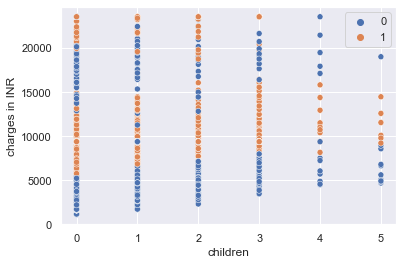

In [45]:
sns.set(color_codes=True)
ax = sns.scatterplot(x="children", y="charges in INR", data=df, hue= labels)
plt.show()

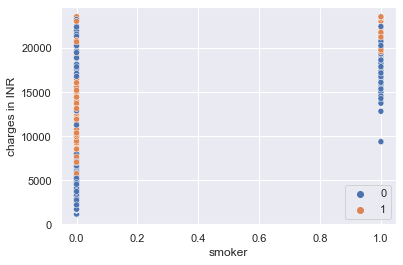

In [46]:
sns.set(color_codes=True)
ax = sns.scatterplot(x="smoker", y="charges in INR", data=df, hue= labels)
plt.show()

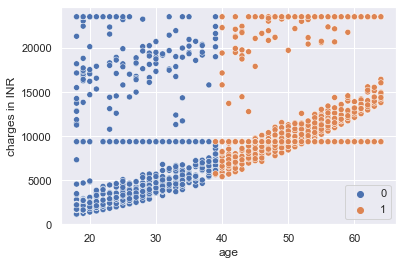

In [47]:
sns.set(color_codes=True)
ax = sns.scatterplot(x="age", y="charges in INR", data=df, hue= labels)
plt.show()

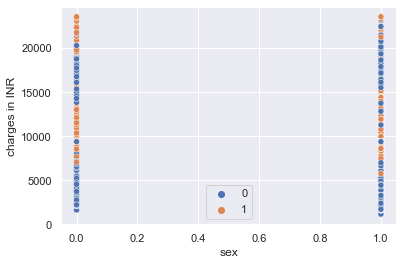

In [48]:
sns.set(color_codes=True)
ax = sns.scatterplot(x="sex", y="charges in INR", data=df, hue= labels)
plt.show()

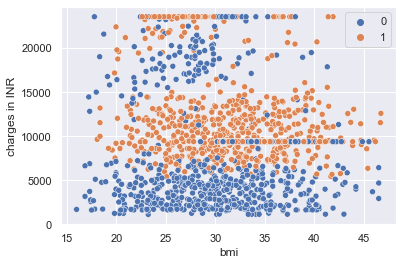

In [49]:
sns.set(color_codes=True)
ax = sns.scatterplot(x="bmi", y="charges in INR", data=df, hue= labels)
plt.show()

In [50]:
labels


array([0, 0, 1, ..., 1, 0, 1])

In [51]:
labels_df = pd.DataFrame(labels,columns= ['labels'] )

In [52]:
new_df = df_copy.join(labels_df, how = 'left')
new_df

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR,labels
0,PLC157006,0,0,southwest,23,1,34.400,1826.84300,0
1,PLC157033,1,0,southwest,19,1,24.600,1837.23700,0
2,PLC157060,0,0,southwest,56,1,40.300,10602.38500,1
3,PLC157087,1,0,southwest,30,0,32.400,4149.73600,0
4,PLC157186,5,0,southwest,19,0,28.600,4687.79700,0
...,...,...,...,...,...,...,...,...,...
1333,PLC168400,1,1,northeast,39,1,29.925,22462.04375,0
1334,PLC168436,0,1,northeast,18,0,21.660,14283.45940,0
1335,PLC168634,2,1,northeast,42,1,24.605,21259.37795,1
1336,PLC168652,0,1,northeast,29,0,21.850,16115.30450,0


In [53]:
m = new_df.drop(['charges in INR', 'region', 'Policy no.'], axis = 1)
n = new_df['charges in INR']

In [64]:
multiple_model(m,n)

,Model Name,R2 Score,RMSE
9,XGBoost Regression,0.610974,3929.138377
8,GradientBoost Regression,0.594659,4010.682881
6,Random Forest Regression,0.545024,4249.151640
7,AdaBoost Regression,0.532890,4305.442545
0,Linear Regression,0.437569,4724.357995
1,Lasso Regression,0.437559,4724.400673
2,Ridge Regression,0.437484,4724.714945
3,Decision Tree Regression,0.251089,5451.590566
4,KNR Regression,0.178557,5709.481381
5,SVR Regression,0.001523,6294.728761


In [65]:
cv(m,n)

,Model Name,Score Mean,Score SD
9,XGBoost Regressor,0.480217,0.130271
8,GradientBosst Regressor,0.470756,0.115906
6,Random Forest Regressor,0.377419,0.166083
7,AdaBoost Regressor,0.327829,0.143995
2,Ridge,0.255995,0.292020
1,Lasso,0.255994,0.292388
0,Linear Regression,0.255905,0.292297
4,K Nearest Neighbors Regressor,-0.038954,0.523269
3,Decision Tree Regressor,-0.103300,0.382853
5,Support Vector Regressor,-0.294433,0.543998


In [66]:
cv_tuned(m,n)

,Model Name,Score Mean,Score SD
8,GradientBosst Regressor,0.480655,0.112670
9,XGBoost Regressor,0.478959,0.120389
6,Random Forest Regressor,0.373985,0.171908
7,AdaBoost Regressor,0.293467,0.113783
2,Ridge,0.255995,0.292020
1,Lasso,0.255914,0.292306
0,Linear Regression,0.255905,0.292297
4,K Nearest Neighbors Regressor,-0.016490,0.597331
3,Decision Tree Regressor,-0.165704,0.442184
5,Support Vector Regressor,-0.294433,0.543998


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

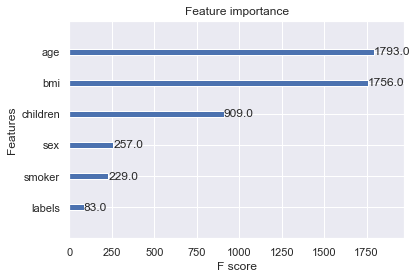

In [67]:
xgb = XGBRFRegressor()
xgb.fit(m,n)
xgboost.plot_importance(xgb)

# Generating Learning Curve

In [68]:
def glc(model_name, estimator, X, y, fold = 10):
    train_size, train_score, test_score = learning_curve(estimator, X, y, cv = fold)
    train_score_mean = np.mean(train_score, axis = 1)
    test_score_mean = np.mean(test_score, axis= 1)
    plt.plot(train_size, train_score_mean, color = 'orange')
    plt.plot(train_size, test_score_mean, color = 'green')
    plt.xlabel('samples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve for' + model_name)
    plt.legend('train score', 'test score')

### Learning Curve before Clustering

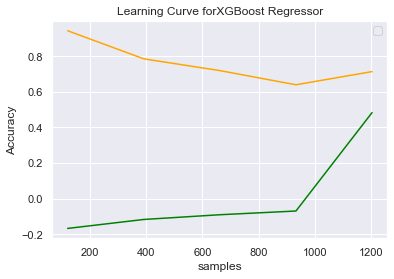

In [69]:
glc('XGBoost Regressor', XGBRFRegressor(), X,y, fold= 10)

### Learning Curve after Clustering

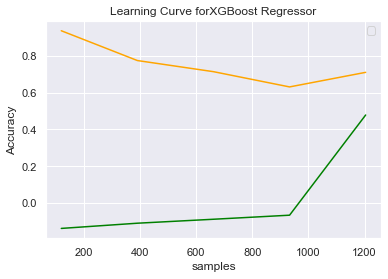

In [70]:
glc('XGBoost Regressor', XGBRFRegressor(), m,n, fold= 10)